In [271]:
import pandas as pd
from pathlib import Path
import datetime
import geopy.distance

file = str(Path.home())+"/.imp/gossip_writeup_postprocessing.csv"
df = pd.read_csv(file) 

df=df.rename(columns={'timestamp':'posix_timestamp'})
df['posix_timestamp']=df['posix_timestamp'].round(decimals=3)
GENESIS_TIME=1590537600
df['slot_timestamp']=df['slot']*12.0 + GENESIS_TIME 
df['relative_timestamp']=df['posix_timestamp']-df['slot_timestamp']

# load dht data
%store -r df_dht

display(df['posix_timestamp'].max())
display(df['slot'].max())

df = pd.merge(df, df_dht, on='peer_id', how='left',suffixes=('', '_y'))
df.drop(df.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
df['is_validator']=df['subnet_ids']!='[]'

REF_LOC=(32.894970,-97.187430)
distance=[]
for coordinates in df['coordinates'].to_list():
    distance.append(geopy.distance.vincenty(coordinates, REF_LOC).km)
df['distance']=distance
#df=df[df['slot']<=112867]
df.head(n=5)

1592093966.11

129697

/Users/jonny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning:

Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.



index            posix_timestamp                                    message_id                                                peer_id                                   topic  message_size    slot  proposer_index             slot_timestamp  relative_timestamp             timestamp                                                           node_id            ip4                  tcp4   udp4  ip6  tcp6  udp6  next_fork_version       next_fork_epoch fork_digest  seq_no subnet_ids                                                                                                                                                                                                                                                   enr        coordinates  is_validator             distance
0  0     1591807044.338999986648560  9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=  16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb  /eth2/f6775d07/beacon_block/ssz_snappy  1584          105787  492            1591807044.000000000000000 0.338999986648560    2020-06-15][11:06:18  eb353d66e608aa61933fa5a2b0b16b9980065633d3abcfbef956fea87f2e1878  104.190.27.0  9000.000000000000000   9000   NaN nan   nan    113                18446744073709551615  f6775d07    15      [19]       enr:-LK4QH6nl7gw0UtSdYv-jgleSUvJxbBdHL22kPeXyFSRkvmGRMlXeqiv6Mf-HNgjyB8WkMhGRY4rV6oe33Qe8Y2WZNIPh2F0dG5ldHOIAAAIAAAAAACEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhGi-GwCJc2VjcDI1NmsxoQLz2pdBEwOy2_gyO-pGD9_6sH8W43pFeeZ5hUcME0w8woN0Y3CCIyiDdWRwgiMo  29.7633,-95.3633   True         388.187137993303224 
1  1     1591807044.556999921798706  9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=  16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e  /eth2/f6775d07/beacon_block/ssz_snappy  1584          105787  492            1591807044.000000000000000 0.556999921798706    2020-06-15][11:06:18  a08f914106b772a8a939689d6d14e50c7754df6111f9a6d4bb306afa632b18e9  3.233.217.200 9000.000000000000000   9000   NaN nan   nan    113                18446744073709551615  f6775d07    1       []         enr:-LK4QGLv-71xVsQ0zZq6hfpA4f3AW4vE0dWoW5jJjb-VjjxnaaoxIMIpKSJwM4pz25WCKKiFGhvQVWnYuF3CsNY5rBEBh2F0dG5ldHOIAAAAAAAAAACEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhAPp2ciJc2VjcDI1NmsxoQMZIaFoHuNOy1WURF3xq-M49Mg8G0i2cNpGt2j1A5gH-YN0Y3CCIyiDdWRwgiMo  36.8080,-76.0284   False        1978.708742628404480
2  2     1591807044.742000102996826  9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=  16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RKAPSZzLe  /eth2/f6775d07/beacon_block/ssz_snappy  1584          105787  492            1591807044.000000000000000 0.742000102996826    2020-06-15][11:06:18  38006854869cbddf9156a355869adefbd323273766cb2c179a13da83b45d1ce1  54.243.252.53 13000.000000000000000  13000  NaN nan   nan    113                18446744073709551615  f6775d07    5       []         enr:-LK4QKwRnRVb7lps_Q9516bAlSE-rmWYMdO8dO4GE74DiQ_ecpZ_F8I24fYCXiP1h-bitXDO0Tpr9II8QJSwU11DkUUFh2F0dG5ldHOIAAAAAAAAAACEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhDbz_DWJc2VjcDI1NmsxoQJjwXmPxs41IbsE-YdxM73EvSHbvyK8hCpg528lt6N6B4N0Y3CCMsiDdWRwgjLI  36.8080,-76.0284   False        1978.708742628404480
3  3     1591807044.923000097274780  9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=  16Uiu2HAm8Cv8tCXbAaV9MfvUuTP7BF5y1pZXRainP5VxkpVvZnZa  /eth2/f6775d07/beacon_block/ssz_snappy  1584          105787  492            1591807044.000000000000000 0.923000097274780    2020-06-15][11:06:18  0096cdf94b72097a2accbe2f53396d97a5adbb255e3de2dcf5c856bde6dcdc85  138.68.12.21  9000.000000000000000   9000   NaN nan   nan    113                18446744073709551615  f6775d07    9       [13]       enr:-LK4QIqTXvroJqUG2oYGLNxQOO1ES2SdVsWZPUTX37jAotE7clLRrHgkPSiD4mAl6Yr4uehq6mLc8Jdm-677f1ccUQMJh2F0dG5ldHOIACAAAAAAAACEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhIpEDBWJc2VjcDI1NmsxoQK942L3MMtkXJCkpLKai5dKNnq5jcm7-50MqOtfqNuVxYN0Y3CCIyiDdWRwgiMo  37.3483,-121.9844  True         2306.521531147574024
4  4     1591807045.101999998092651  9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=  16Uiu

In [272]:
import pandas as pd
from pathlib import Path
import json


file = str(Path.home())+"/.witti/afri-lh-keys.txt"
lh_keys = pd.read_csv(file,header=None)[0].to_list()

file = str(Path.home())+"/.witti/afri-prysm-keys.txt"
prysm_keys = pd.read_csv(file,header=None)[0].to_list()

file = str(Path.home())+"/.witti/afri-teku-keys.txt"
teku_keys = pd.read_csv(file,header=None)[0].to_list()

afrikeys_to_client = dict.fromkeys(lh_keys , 'lighthouse')
afrikeys_to_client.update(dict.fromkeys(prysm_keys , 'prysm'))
afrikeys_to_client.update(dict.fromkeys(teku_keys , 'teku'))

with open(str(Path.home())+"/.witti/pubkeys.json") as json_file: 
    pubkeys_to_indexes = json.load(json_file) 
    

df_validator_registry = pd.DataFrame({'index' : list(pubkeys_to_indexes.values()),'pubkey' : list(pubkeys_to_indexes.keys())})

clients=[]
is_afrikeys=[]
for key in df_validator_registry['pubkey'].to_list():
    if key in afrikeys_to_client:
        is_afrikeys.append(1)
        clients.append(afrikeys_to_client[key])
    else:
        is_afrikeys.append(0)
        clients.append('unknown')
    

df_validator_registry['is_afri_key']=is_afrikeys
df_validator_registry['client']=clients

In [273]:
# basics numbers
start_slot = df['slot'].min()
end_slot = df['slot'].max()
print("Starting slot: {}".format(start_slot))
print("Ending slot: {}".format(end_slot))
print("Number of slots: {}".format(end_slot-start_slot))
num_messages = len(df)
print("Number of messages: {}".format(num_messages))
print("Average number of messages per slot: {}".format(num_messages/(end_slot-start_slot)))
print("Number of messages from validating nodes: {}".format((len(df[df['is_validator']==True]))))
print("Number of messages from non-validating nodes: {}".format((len(df[df['is_validator']==False]))))
peers=set(df['peer_id'])
print("Number of peers: {}".format((len(peers))))
validating_peers=set(df[df['is_validator']==True]['peer_id'].to_list())
print("Number of peers validating: {}".format((len(validating_peers))))
non_validating_peers=set(df[df['is_validator']==False]['peer_id'].to_list())
print("Number of peers not validating: {}".format((len(non_validating_peers))))

block_slots_received = set(df['slot'].to_list())
slots=set(range(df['slot'].min(),df['slot'].max()))
print("Number of missing block slots:", len(slots.difference(block_slots_received)), "of", df['slot'].max()-df['slot'].min()) 
 

Starting slot: 105787
Ending slot: 129697
Number of slots: 23910
Number of messages: 268089
Average number of messages per slot: 11.212421580928481
Number of messages from validating nodes: 167268
Number of messages from non-validating nodes: 100821
Number of peers: 19
Number of peers validating: 12
Number of peers not validating: 7
Number of missing block slots: 5319 of 23910


In [274]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.15f' % x)


pd.reset_option('display.max_rows')

In [275]:
grouped_df = df.groupby(['proposer_index','message_id','slot','message_size']).agg({'relative_timestamp':['count','std','min','max']})
grouped_df.columns = ['_'.join(col).strip() for col in grouped_df.columns.values]
grouped_df = grouped_df.reset_index()
grouped_df

proposer_index                                    message_id    slot  message_size  relative_timestamp_count  relative_timestamp_std  relative_timestamp_min  relative_timestamp_max
0      0               -Q8lSEgZsnXwl-6BnBd1Plgqo7BwK6R77LC9UbOMOCQ=  124951  1112          15                       0.603692948087544       0.349999904632568       2.263000011444092      
1      0               3qDuLN11Ayyfd7tGE8pomyOfY3dLoSbngcDrY7xuIwI=  121336  640           15                       0.359543489888071       0.395999908447266       1.533999919891357      
2      0               9BeAZufMnHzsSGcTBo_22hG6jvQrbuGiSiGXGi7ZIek=  114444  404           15                       0.247296759048447       0.434000015258789       1.216000080108643      
3      0               ElZBSCR0QsfNxUx1Eiz2ZjoElp5smPVpGQ5nXsyipok=  127236  1584          13                       0.715103511694558       0.424999952316284       2.644999980926514      
4      0               L1JPRdb4YURVbfpJirshjy0Ud_GCPkRGzh8IlzxT7N4=  128903  640           13                       3.204807847586690       0.602999925613403       9.848000049591064      
...   ..                                                        ...     ...  ...           ..                                     ...                     ...                     ...      
18587  930             00xui2uKQ0MaNGcyOJxqkgNfcES5qIsSdloSyjA1Shs=  125506  2292          15                       1.168562541668278       0.665999889373779       4.338000059127808      
18588  930             QS3ood_Kv9IBXLWiLq_ptsvexU6jlGepv-vhH33Fgc0=  124297  2292          15                       26.749649236530892      0.898999929428101       106.147000074386597    
18589  930             qRvwhmxIjPeq_nlGa5oe-8Ny_IRavB0bzrt8VW_UKBs=  125153  2056          15                       3.741680656497722       0.780999898910522       11.338000059127808     
18590  931             Sgp_tVzYTmRwvTspBVodXV5VhcncRRieNgOxVwEpfI0=  124704  2056          15                       1.448265670708338       0.663000106811523       5.507999897003174      
18591  931             mRpdGLs4vp-KnKGNgNN0PuaFQxDIwUIVr50WuuKy8Q4=  125490  3236          15                       1.618788930479538       0.631000041961670       5.706000089645386      

[18592 rows x 8 columns]

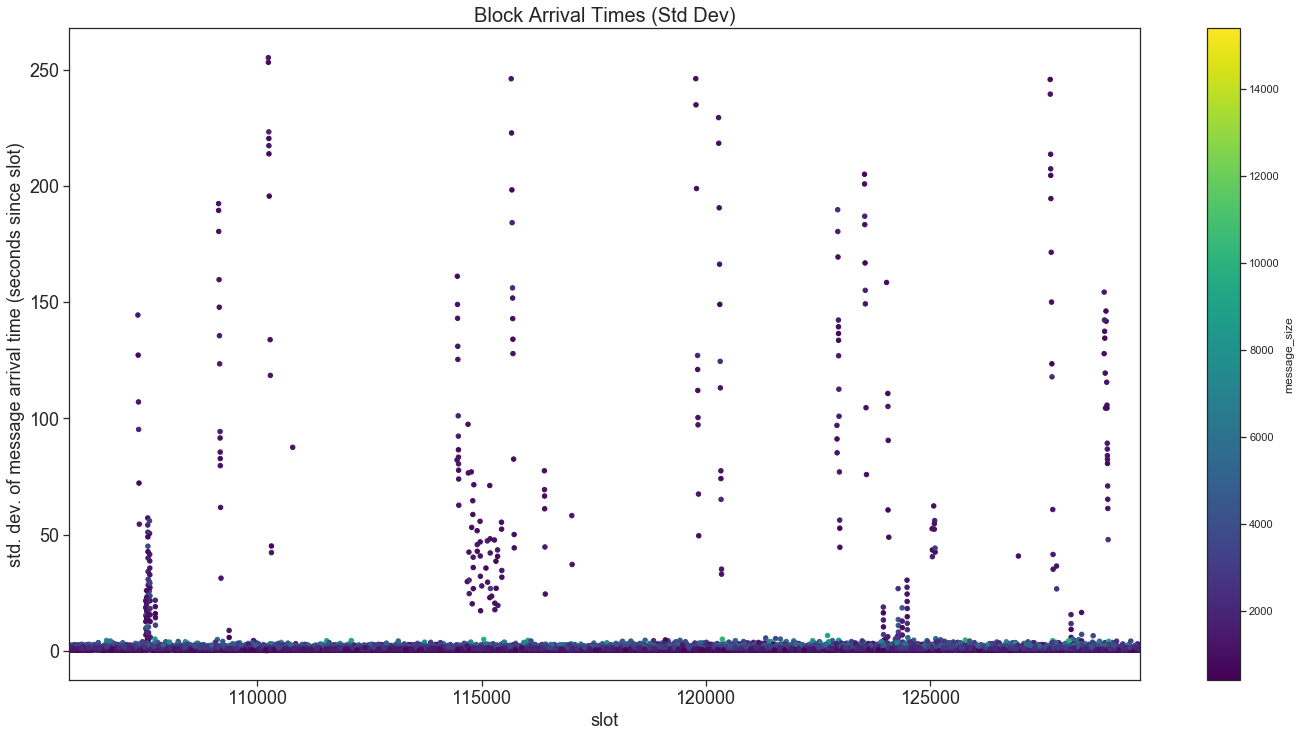

In [276]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xlim = (grouped_df['slot'].min(),grouped_df['slot'].max())
ax=grouped_df.plot.scatter(x='slot',y='relative_timestamp_std',c='message_size',colormap='viridis',xlim=xlim,figsize=(24,12),ax=ax)
ax.set_title("Block Arrival Times (Std Dev)",fontsize=20)
ax.set_xlabel("slot",fontsize=18)
ax.tick_params(axis = "both", labelsize=18)
ax=ax.set_ylabel("std. dev. of message arrival time (seconds since slot)",fontsize=18)

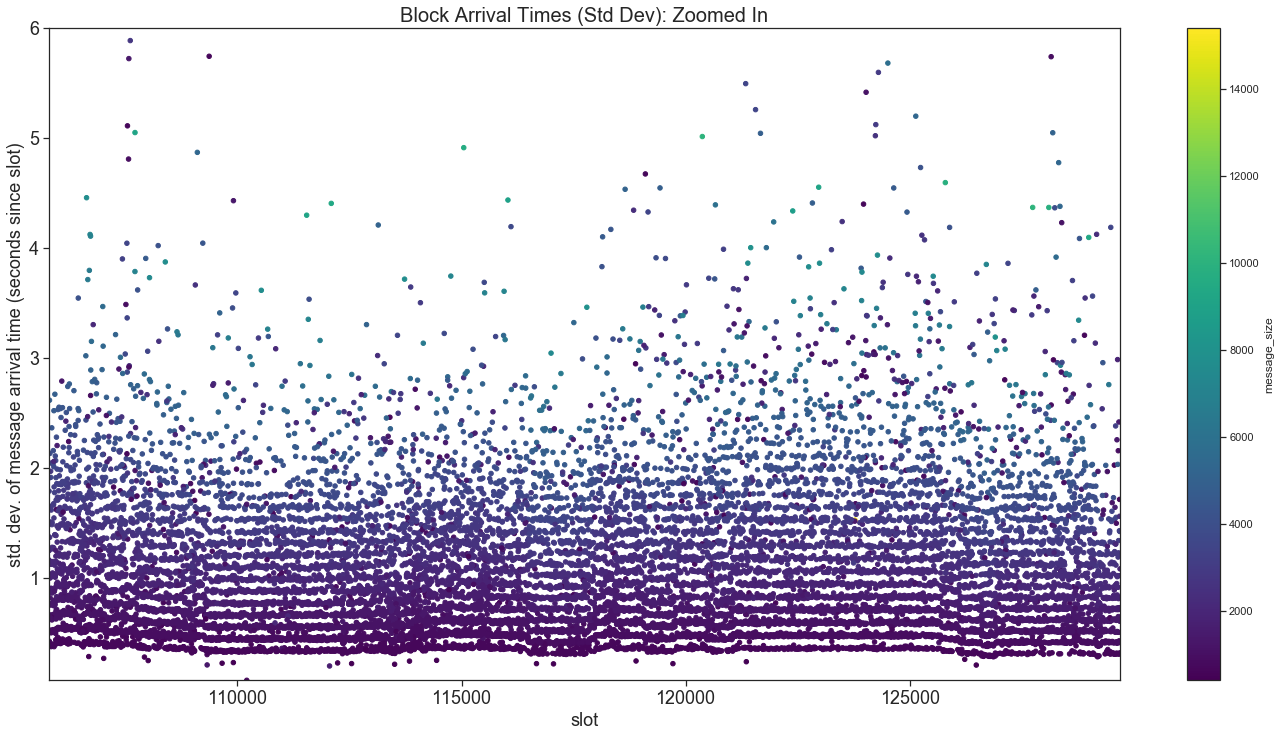

In [277]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xlim = (grouped_df['slot'].min(),grouped_df['slot'].max())
ylim = (grouped_df['relative_timestamp_std'].min(),6)
ax=grouped_df.plot.scatter(x='slot',y='relative_timestamp_std',c='message_size',colormap='viridis',xlim=xlim,ylim=ylim,figsize=(24,12),ax=ax)
ax.set_title("Block Arrival Times (Std Dev): Zoomed In",fontsize=20)
ax.set_xlabel("slot",fontsize=18)
ax.tick_params(axis = "both", labelsize=18)
ax=ax.set_ylabel("std. dev. of message arrival time (seconds since slot)",fontsize=18)

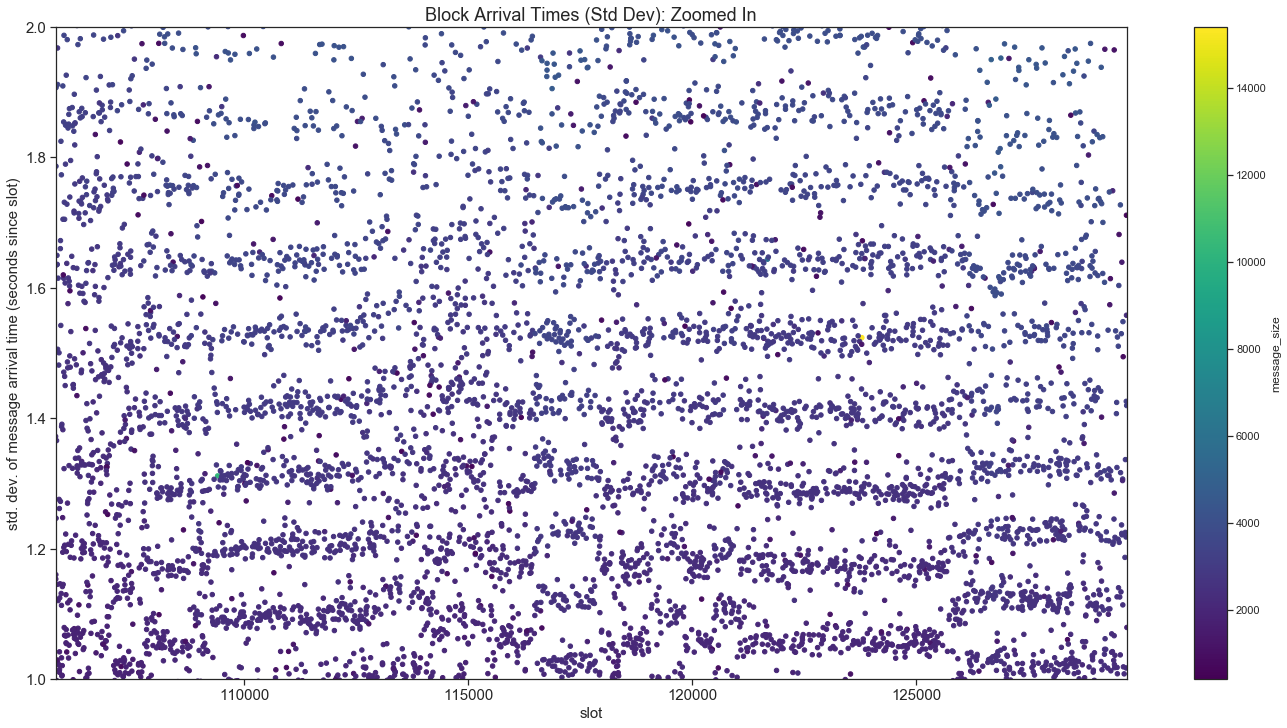

In [278]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xlim = (grouped_df['slot'].min(),grouped_df['slot'].max())
ylim = (1,2)
ax=grouped_df.plot.scatter(x='slot',y='relative_timestamp_std',c='message_size',colormap='viridis',xlim=xlim,ylim=ylim,figsize=(24,12),ax=ax)
ax.set_title("Block Arrival Times (Std Dev): Zoomed In",fontsize=18)
ax.set_xlabel("slot",fontsize=15)
ax.tick_params(axis = "both", labelsize=15)
ax=ax.set_ylabel("std. dev. of message arrival time (seconds since slot)",fontsize=15)

In [279]:
df_grouped_message_size = df[df['relative_timestamp']<12].groupby(['message_size']).agg({'relative_timestamp':['count','std','min','mean','max']}).sort_values('message_size',ascending=True)
df_grouped_message_size.columns = ['_'.join(col).strip() for col in df_grouped_message_size.columns.values]
df_grouped_message_size = df_grouped_message_size.reset_index()
df_grouped_message_size.head(n=10)

message_size  relative_timestamp_count  relative_timestamp_std  relative_timestamp_min  relative_timestamp_mean  relative_timestamp_max
0  404           287                      0.346019111820712       0.234999895095825       0.806240414077812        3.569000005722046      
1  640           21400                    0.917093048158313       -0.230000019073486      1.322194018219119        11.921999931335449     
2  876           40235                    1.068376795938861       -0.335999965667725      1.582031092549520        11.986000061035156     
3  1112          35811                    1.156259412297830       -0.378999948501587      1.809522101728057        11.990999937057495     
4  1348          26380                    1.307344632866294       -0.352999925613403      2.048227482921161        11.980000019073486     
5  1584          21203                    1.469641687651196       -0.398999929428101      2.315510588884635        11.611000061035156     
6  1820          17707                    1.641814550726483       -0.460000038146973      2.630342068459169        11.987999916076660     
7  2056          15575                    1.729553766627334       -0.391000032424927      2.849568668031769        11.887000083923340     
8  2292          13697                    1.716556438623810       -0.403000116348267      3.012897641221703        11.809999942779541     
9  2528          13582                    1.882731127759261       -0.328999996185303      3.338506406018141        11.918999910354614

In [280]:
import plotly.express as px

fig = px.scatter(df_grouped_message_size, x="message_size", y="relative_timestamp_mean", error_y="relative_timestamp_std")
fig.show()

In [281]:
df_grouped_message_id_size=df[df['relative_timestamp']<12].groupby(['message_id','message_size']).agg({'relative_timestamp':['count','std','mean','min','max']}).sort_values('message_size',ascending=True)
df_grouped_message_id_size.columns = ['_'.join(col).strip() for col in df_grouped_message_id_size.columns.values]
df_grouped_message_id_size = df_grouped_message_id_size.reset_index()
df_grouped_message_id_size


message_id  message_size  relative_timestamp_count  relative_timestamp_std  relative_timestamp_mean  relative_timestamp_min  relative_timestamp_max
0      EjwlpdzoVOQkRTflbTd3OPIKHTnaSMoxTr3d6lhGqLU=  404           14                       0.223671970185436       0.765928574970790        0.404999971389771       1.114000082015991      
1      MlIPcwrQ0zJN3G6FReN1NMOjfsqdQK19-R8FXtLLJ6M=  404           13                       0.211727627981122       0.724615372144259        0.387000083923340       1.049999952316284      
2      InubHssgKQRjh2P0BnPB86EpTGIYqEuK3TohWftRXag=  404           14                       0.217219892787653       0.774000014577593        0.428999900817871       1.115000009536743      
3      qHLbrsVcKQdKjK4y0w_d7-wtuuJnja8IwntrKv8xu6Q=  404           14                       0.623577353252641       1.519357136317662        1.020999908447266       3.569000005722046      
4      kypVL5jAzA5dnL4rp8ddgA1Jl5ekGql9K5Ccw1uS6iA=  404           13                       0.256342011745998       0.984076940096342        0.618000030517578       1.540999889373779      
...                                             ...  ...           ..                                     ...                     ...                      ...                     ...      
18546  6r6_nnVnUdbH4nwPumdwDFJac6ObUBEcbJt3LOyQFdc=  9844          11                       3.629570328992905       6.484454545107755        0.986000061035156       11.947999954223633     
18547  RtodENHjg_W3oT8MhXIMtV-q5qVGvcftudvRut9GNK0=  10080         9                        3.074526610584860       6.545666668150160        2.016999959945679       11.020999908447266     
18548  7j_AV5a6VYOuKtaUaE5koHosdYCnkic-2SaTQ2mAtnE=  10080         9                        3.073334168806277       6.963111109203762        2.473999977111816       11.444999933242798     
18549  XI6x0HIBzWL1D6f4gTGzh1GSbWBzBdTs2hoxq8iuOPI=  10204         14                       1.311773515742043       4.596928596496582        2.545000076293945       6.630000114440918      
18550  ynHGgIQPPY50vOvJB-FT0qKMC-hUMgTjBD-P5_ZTums=  15400         15                       1.523754286258550       6.088866662979126        3.690999984741211       8.467999935150146      

[18551 rows x 7 columns]

In [282]:
temp=df_grouped_message_id_size.groupby(['message_size']).agg({'message_size':['count']})
temp.columns = ['_'.join(col).strip() for col in temp.columns.values]
temp = temp.reset_index()
df_grouped_message_id_size = pd.merge(df_grouped_message_id_size, temp, on='message_size', how='inner',suffixes=('', '_y'))
df_grouped_message_id_size.drop(df_grouped_message_id_size.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
display(df_grouped_message_id_size.head())
df_grouped_message_size['message_size_count']=temp['message_size_count']
display(df_grouped_message_size.head(n=50))

message_id  message_size  relative_timestamp_count  relative_timestamp_std  relative_timestamp_mean  relative_timestamp_min  relative_timestamp_max  message_size_count
0  EjwlpdzoVOQkRTflbTd3OPIKHTnaSMoxTr3d6lhGqLU=  404           14                       0.223671970185436       0.765928574970790        0.404999971389771       1.114000082015991        20                
1  MlIPcwrQ0zJN3G6FReN1NMOjfsqdQK19-R8FXtLLJ6M=  404           13                       0.211727627981122       0.724615372144259        0.387000083923340       1.049999952316284        20                
2  InubHssgKQRjh2P0BnPB86EpTGIYqEuK3TohWftRXag=  404           14                       0.217219892787653       0.774000014577593        0.428999900817871       1.115000009536743        20                
3  qHLbrsVcKQdKjK4y0w_d7-wtuuJnja8IwntrKv8xu6Q=  404           14                       0.623577353252641       1.519357136317662        1.020999908447266       3.569000005722046        20                
4  kypVL5jAzA5dnL4rp8ddgA1Jl5ekGql9K5Ccw1uS6iA=  404           13                       0.256342011745998       0.984076940096342        0.618000030517578       1.540999889373779        20

message_size  relative_timestamp_count  relative_timestamp_std  relative_timestamp_min  relative_timestamp_mean  relative_timestamp_max  message_size_count
0   404           287                      0.346019111820712       0.234999895095825       0.806240414077812        3.569000005722046        20                
1   640           21400                    0.917093048158313       -0.230000019073486      1.322194018219119        11.921999931335449       1481              
2   876           40235                    1.068376795938861       -0.335999965667725      1.582031092549520        11.986000061035156       2784              
3   1112          35811                    1.156259412297830       -0.378999948501587      1.809522101728057        11.990999937057495       2483              
4   1348          26380                    1.307344632866294       -0.352999925613403      2.048227482921161        11.980000019073486       1839              
5   1584          21203                    1.469641687651196       -0.398999929428101      2.315510588884635        11.611000061035156       1476              
6   1820          17707                    1.641814550726483       -0.460000038146973      2.630342068459169        11.987999916076660       1234              
7   2056          15575                    1.729553766627334       -0.391000032424927      2.849568668031769        11.887000083923340       1082              
8   2292          13697                    1.716556438623810       -0.403000116348267      3.012897641221703        11.809999942779541       955               
9   2528          13582                    1.882731127759261       -0.328999996185303      3.338506406018141        11.918999910354614       949               
10  2764          11458                    1.937152733616937       -0.309999942779541      3.524867429244703        11.980999946594238       798               
11  3000          10541                    2.126062621483526       -0.460000038146973      3.915499478134685        11.970999956130981       734               
12  3236          8086                     2.096434649656103       -0.302000045776367      3.973528816061329        11.974999904632568       561               
13  3296          13                       0.908816454632185       4.901999950408936       6.320230759107149        7.717999935150146        1                 
14  3472          7023                     2.151364780055427       -0.257999897003174      4.186354834045862        11.992000102996826       495               
15  3708          5663                     2.267192218704325       -0.335999965667725      4.334567895104854        11.999000072479248       398               
16  3944          4467                     2.380692443655708       -0.059999942779541      4.610287665360081        11.911000013351440       314               
17  4180          2812                     2.453982256364127       -0.301000118255615      4.778895448485275        11.996000051498413       199               
18  4416          2493                     2.518203415135216       -0.160000085830688      5.086276773463470        11.907999992370605       175               
19  4652          1929                     2.573999847907082       -0.003000020980835      5.226869359790135        11.923000097274780       137               
20  4888          1368                     2.669948046500021       0.358000040054321       5.362467106148514        11.979000091552734       98                
21  5124          1200                     2.746293274355780       0.367000102996826       5.556849999626477        11.838999986648560       87                
22  5360          940                      2.818890988588588       0.345000028610229       5.611208512174322        11.963999986648560       69                
23  5596          578                      2.889659433892709       0.325999975204468       6.136039789160230        11.986000061035156       41                
24  

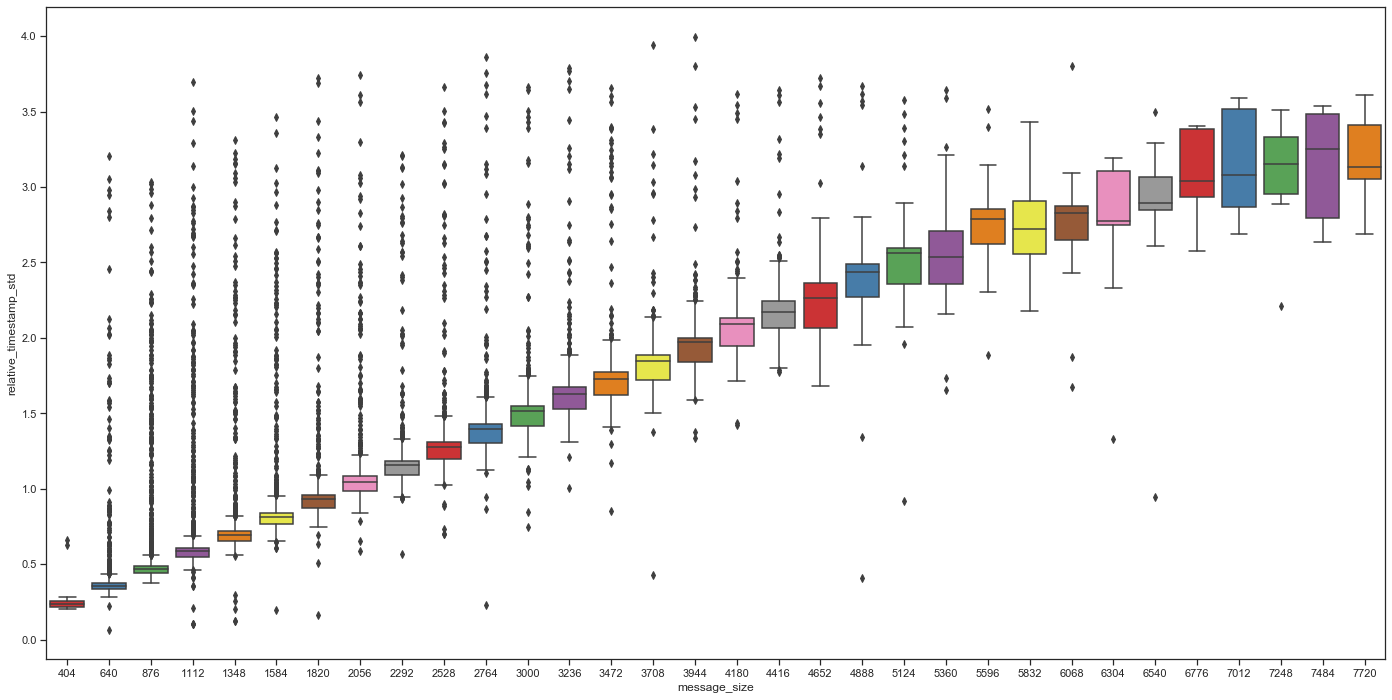

In [283]:
import seaborn as sns
plt.figure(figsize=(24,12))
a=sns.boxplot(x="message_size", y="relative_timestamp_std", data=df_grouped_message_id_size[df_grouped_message_id_size['message_size_count']>4], palette="Set1")
#a.set(ylim=(0,4))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


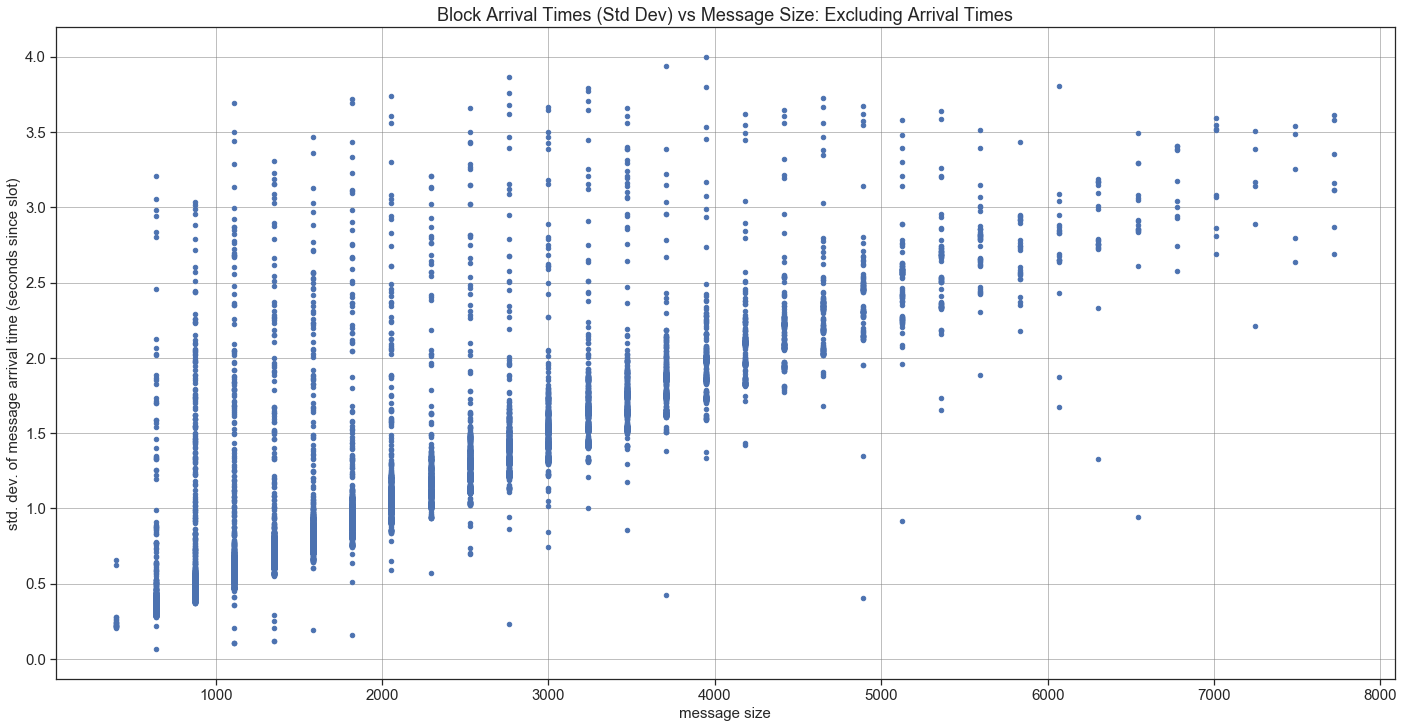

In [284]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
#xlim = (df_grouped_message_size['message_size'].min(),df_grouped_message_size['message_size'].max()+500)
#ylim = (df_grouped_message_size['relative_timestamp_std'].min(),df_grouped_message_size['relative_timestamp_std'].max()+.5)
ax=df_grouped_message_id_size[df_grouped_message_id_size['message_size_count']>4].plot.scatter(x='message_size',y='relative_timestamp_std',figsize=(24,12),ax=ax)
ax.set_title("Block Arrival Times (Std Dev) vs Message Size: Excluding Arrival Times",fontsize=18)
ax.set_xlabel("message size",fontsize=15)
ax.tick_params(axis = "both", labelsize=15)
plt.grid(b=True,linestyle='-', linewidth='0.5', color='grey',which='both')
ax=ax.set_ylabel("std. dev. of message arrival time (seconds since slot)",fontsize=15)

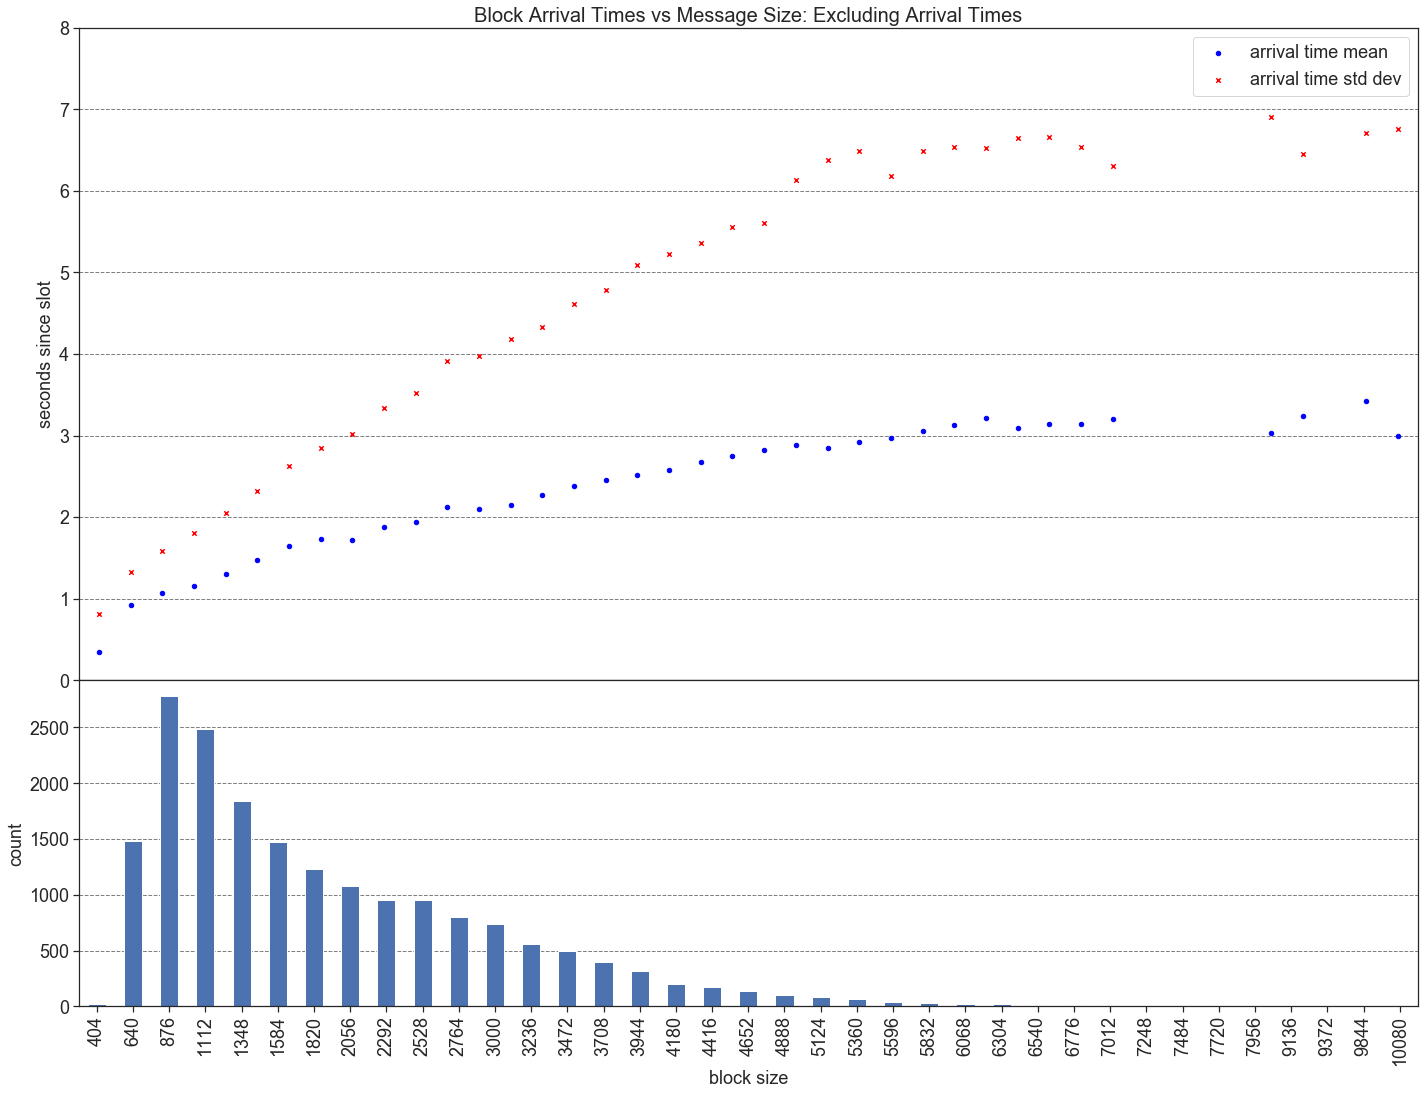

In [285]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig, ax = plt.subplots(ncols=1, nrows=2,gridspec_kw = {'wspace':0, 'hspace':0, 'height_ratios':[2,1]})

xlimit=df_grouped_message_size[df_grouped_message_size['message_size_count']>1]['message_size']
xlim = (xlimit.min()-150,xlimit.max()+150)
ylim = (0,8)

ax[0]=df_grouped_message_size[df_grouped_message_size['message_size_count']>1].plot.scatter(x='message_size',y='relative_timestamp_std',marker='o',c='blue',rot=90,xticks=xlimit.to_list(),xlim=xlim,ylim=ylim,figsize=(24,18),ax=ax[0])
ax[0]=df_grouped_message_size[df_grouped_message_size['message_size_count']>1].plot.scatter(x='message_size',y='relative_timestamp_mean',marker='x',c='red',rot=90,xticks=xlimit.to_list(),xlim=xlim,ylim=ylim,figsize=(24,18),ax=ax[0])
ax[0].legend(loc='upper right',labels=['arrival time mean', 'arrival time std dev'],fontsize=18)
ax[0].set_title("Block Arrival Times (Including Duplicates) vs Message Size",fontsize=20)
ax[0].set_xlabel("")
ax[0].tick_params(axis = "both", labelsize=18)
ax[0].grid(b=True,linestyle='--', linewidth='1', color='grey',which='both',axis='y')
ax[0].set_ylabel("seconds since slot",fontsize=18)
ax[0].xaxis.set_ticklabels([])

ax[1]=df_grouped_message_size[df_grouped_message_size['message_size_count']>1].plot(kind='bar',x='message_size',y='message_size_count',ax=ax[1])
ax[1].set_xlabel("block size",fontsize=18)
ax[1].tick_params(axis = "both", labelsize=18)
ax[1].legend().set_visible(False)
plt.grid(b=True,linestyle='--', linewidth='1', color='grey',which='both',axis='y')
ax[1].set_ylabel("count",fontsize=18)
fig.subplots_adjust(wspace=None, hspace=None)



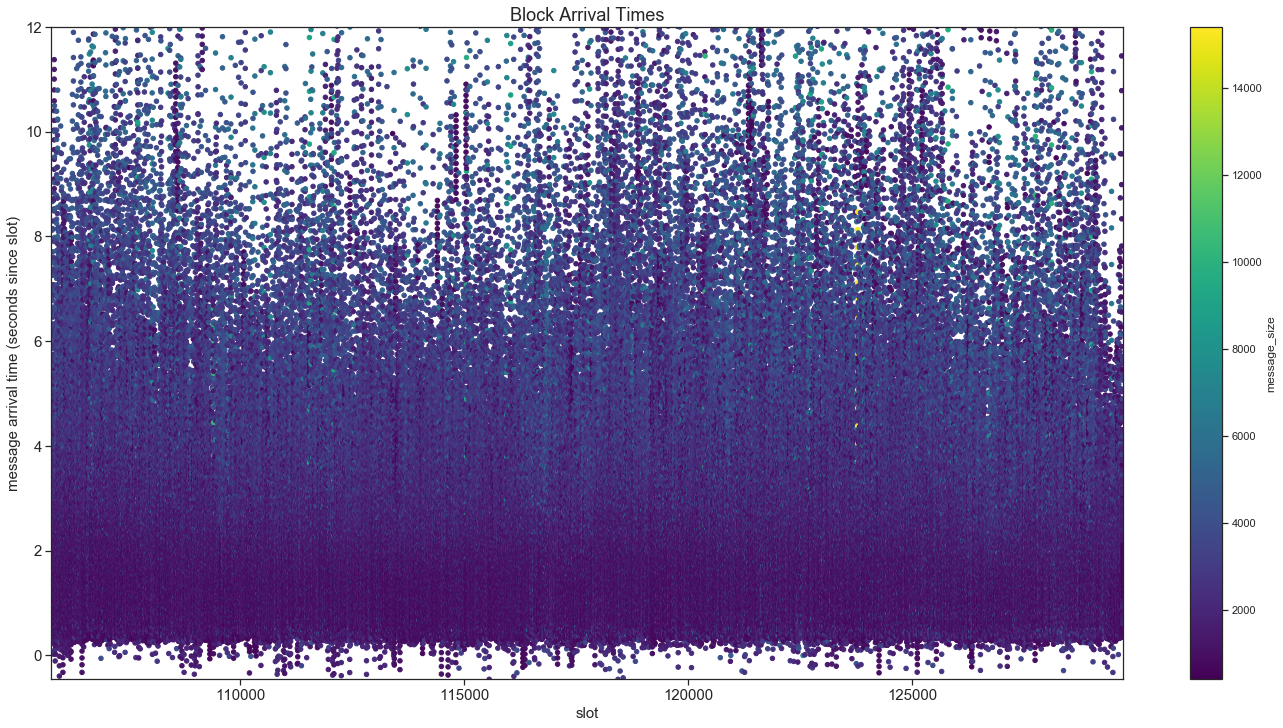

In [288]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xlim = (df['slot'].min(),df['slot'].max())
ylim = (df['relative_timestamp'].min(),12)
ax=df.plot.scatter(x='slot',y='relative_timestamp',c='message_size',colormap='viridis',xlim=xlim,ylim=ylim,figsize=(24,12),ax=ax)
ax.set_title("Block Arrival Times",fontsize=18)
ax.set_xlabel("slot",fontsize=15)
ax.tick_params(axis = "both", labelsize=15)
ax=ax.set_ylabel("message arrival time (seconds since slot)",fontsize=15)

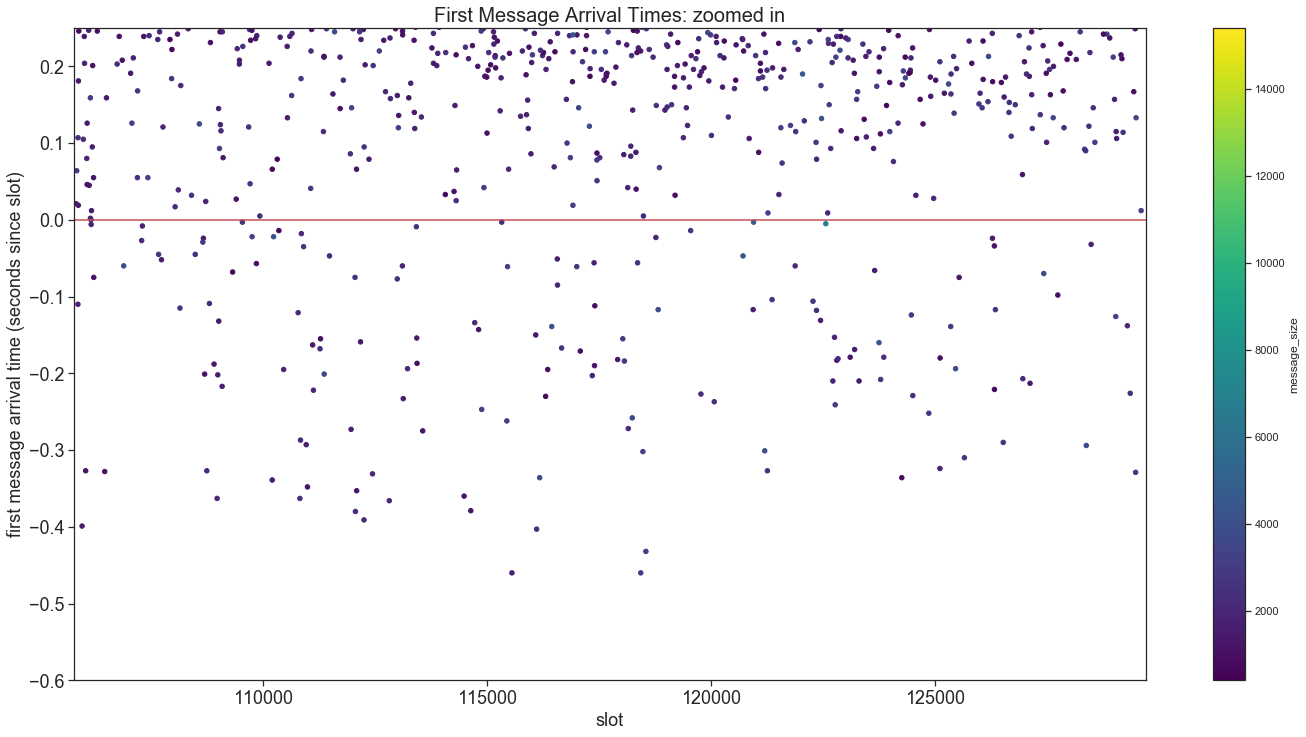

In [289]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xlim = (grouped_df['slot'].min(),grouped_df['slot'].max())
ylim = (-.6,.25)
ax=grouped_df.plot.scatter(x='slot',y='relative_timestamp_min',c='message_size',colormap='viridis',ylim=ylim,xlim=xlim,figsize=(24,12),ax=ax)
ax.set_title("First Message Arrival Times: zoomed in",fontsize=20)
ax.set_xlabel("slot",fontsize=18)
ax.tick_params(axis = "both", labelsize=18)
ax.set_ylabel("first message arrival time (seconds since slot)",fontsize=18)
ax=ax.axhline(y=0.0, color='r', linestyle='-')

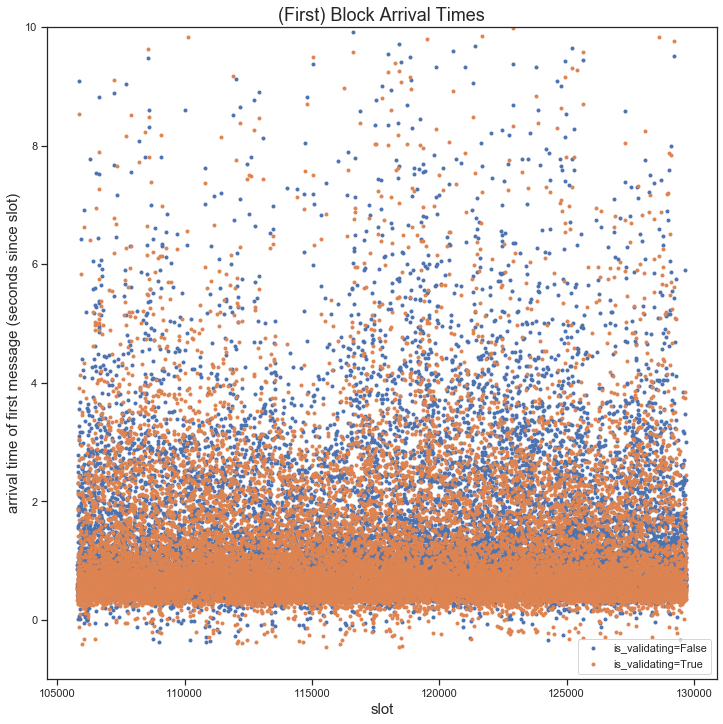

In [290]:
import matplotlib.pyplot as plt

df_grouped_is_validator = df.groupby(['proposer_index','message_id','slot','is_validator']).agg({'relative_timestamp':['count','std','min','max']})
df_grouped_is_validator.columns = ['_'.join(col).strip() for col in df_grouped_is_validator.columns.values]
df_grouped_is_validator = df_grouped_is_validator.reset_index()


groups = df_grouped_is_validator.groupby('is_validator')

# Plot
fig, ax = plt.subplots(figsize=(12,12))
ax.margins(0.05) 
for name, group in groups:
    ax.plot(group.slot, group.relative_timestamp_min, marker='.', linestyle='', label="is_validating="+str(name))
ax.legend()
ax.set_ylim(-1,10)
ax.set_title("(First) Block Arrival Times",fontsize=18)
plt.ylabel("arrival time of first message (seconds since slot)",fontsize=15)
plt.xlabel("slot",fontsize=15)
plt.show()



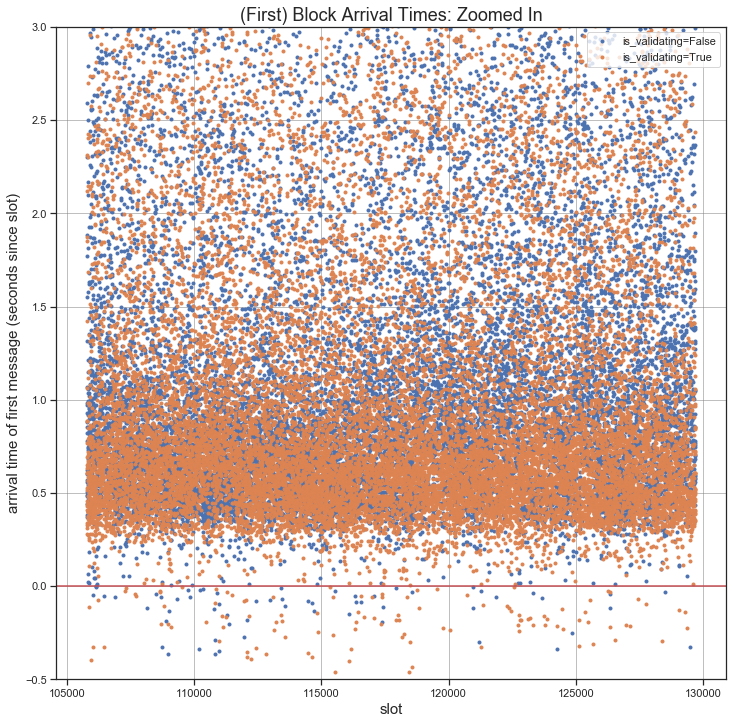

In [291]:
import matplotlib.pyplot as plt

# Plot
fig, ax = plt.subplots(figsize=(12,12))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.slot, group.relative_timestamp_min, marker='.', linestyle='', label="is_validating="+str(name))
ax.legend(loc='upper right')
ax.set_title("(First) Block Arrival Times: Zoomed In",fontsize=18)
ax.set_ylim(-.5,3)
ax=ax.axhline(y=0.0, color='r', linestyle='-')
plt.ylabel("arrival time of first message (seconds since slot)",fontsize=15)
plt.xlabel("slot",fontsize=15)
plt.grid(b=True,linestyle='-', linewidth='0.5', color='grey',which='both')
plt.show()

In [292]:
df[df['relative_timestamp']<=12].groupby(['is_validator'])['relative_timestamp'].describe()

count              mean               std                min               25%               50%               75%                max
is_validator                                                                                                                                                       
False        100237.000000000000000 2.508206630108230 1.926757979950660 -0.362999916076660 1.158999919891357 1.911000013351440 3.250000000000000 11.999000072479248
True         166015.000000000000000 2.682172044791310 1.961983540490075 -0.460000038146973 1.293999910354614 2.101000070571899 3.519000053405762 12.000000000000000

In [293]:
df_outer = pd.merge(df, grouped_df, on='message_id', how='outer',suffixes=('', '_y'))
df_outer.drop(df_outer.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
df_outer

index            posix_timestamp                                    message_id                                                peer_id                                   topic  message_size    slot  proposer_index             slot_timestamp  relative_timestamp             timestamp                                                           node_id            ip4                  tcp4   udp4  ip6  tcp6  udp6  next_fork_version       next_fork_epoch fork_digest  seq_no subnet_ids                                                                                                                                                                                                                                                   enr        coordinates  is_validator             distance  relative_timestamp_count  relative_timestamp_std  relative_timestamp_min  relative_timestamp_max
0       0      1591807044.338999986648560  9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=  16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb  /eth2/f6775d07/beacon_block/ssz_snappy  1584          105787  492            1591807044.000000000000000 0.338999986648560    2020-06-15][11:06:18  eb353d66e608aa61933fa5a2b0b16b9980065633d3abcfbef956fea87f2e1878  104.190.27.0  9000.000000000000000   9000   NaN nan   nan    113                18446744073709551615  f6775d07    15      [19]       enr:-LK4QH6nl7gw0UtSdYv-jgleSUvJxbBdHL22kPeXyFSRkvmGRMlXeqiv6Mf-HNgjyB8WkMhGRY4rV6oe33Qe8Y2WZNIPh2F0dG5ldHOIAAAIAAAAAACEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhGi-GwCJc2VjcDI1NmsxoQLz2pdBEwOy2_gyO-pGD9_6sH8W43pFeeZ5hUcME0w8woN0Y3CCIyiDdWRwgiMo  29.7633,-95.3633   True         388.187137993303224   16                       0.867455246658940       0.338999986648560       3.095000028610229      
1       1      1591807044.556999921798706  9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=  16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e  /eth2/f6775d07/beacon_block/ssz_snappy  1584          105787  492            1591807044.000000000000000 0.556999921798706    2020-06-15][11:06:18  a08f914106b772a8a939689d6d14e50c7754df6111f9a6d4bb306afa632b18e9  3.233.217.200 9000.000000000000000   9000   NaN nan   nan    113                18446744073709551615  f6775d07    1       []         enr:-LK4QGLv-71xVsQ0zZq6hfpA4f3AW4vE0dWoW5jJjb-VjjxnaaoxIMIpKSJwM4pz25WCKKiFGhvQVWnYuF3CsNY5rBEBh2F0dG5ldHOIAAAAAAAAAACEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhAPp2ciJc2VjcDI1NmsxoQMZIaFoHuNOy1WURF3xq-M49Mg8G0i2cNpGt2j1A5gH-YN0Y3CCIyiDdWRwgiMo  36.8080,-76.0284   False        1978.708742628404480  16                       0.867455246658940       0.338999986648560       3.095000028610229      
2       2      1591807044.742000102996826  9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=  16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RKAPSZzLe  /eth2/f6775d07/beacon_block/ssz_snappy  1584          105787  492            1591807044.000000000000000 0.742000102996826    2020-06-15][11:06:18  38006854869cbddf9156a355869adefbd323273766cb2c179a13da83b45d1ce1  54.243.252.53 13000.000000000000000  13000  NaN nan   nan    113                18446744073709551615  f6775d07    5       []         enr:-LK4QKwRnRVb7lps_Q9516bAlSE-rmWYMdO8dO4GE74DiQ_ecpZ_F8I24fYCXiP1h-bitXDO0Tpr9II8QJSwU11DkUUFh2F0dG5ldHOIAAAAAAAAAACEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhDbz_DWJc2VjcDI1NmsxoQJjwXmPxs41IbsE-YdxM73EvSHbvyK8hCpg528lt6N6B4N0Y3CCMsiDdWRwgjLI  36.8080,-76.0284   False        1978.708742628404480  16                       0.867455246658940       0.338999986648560       3.095000028610229      
3       3      1591807044.923000097274780  9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=  16Uiu2HAm8Cv8tCXbAaV9MfvUuTP7BF5y1pZXRainP5VxkpVvZnZa  /eth2/f6775d07/beacon_block/ssz_snappy  1584          105787  492            1591807044.000000000000000 0.923000097274780    2020-06-15][11:06:18  0096cdf94b72097a2accbe2f53396d97a5adbb255e3de2dcf5c856bde6dcdc85  138.68.12.21  9000.000000000000000   9000   NaN nan   nan    113                18446744073709551615  f6

In [294]:
pd.reset_option('display.max_rows')
df_first = df_outer.sort_values('relative_timestamp',ascending=True).groupby('message_id').first().reset_index()
display(df_first.head())
df_first[df_first["relative_timestamp_min"]!=df_first["relative_timestamp"]]

message_id   index            posix_timestamp                                                peer_id                                   topic  message_size    slot  proposer_index             slot_timestamp  relative_timestamp             timestamp                                                           node_id             ip4                  tcp4   udp4  ip6  tcp6  udp6  next_fork_version       next_fork_epoch fork_digest  seq_no    subnet_ids                                                                                                                                                                                                                                                   enr        coordinates  is_validator             distance  relative_timestamp_count  relative_timestamp_std  relative_timestamp_min  relative_timestamp_max
0  --JQlD_K8JBdZfD86-V7R3OyelwCh0fYLO0BUdtsNHo=  208204 1592024052.855999946594238  16Uiu2HAmCuRqUMfpXa8ETkdNYN3vTFxbfRLoDsMjpPVunijbmYdu  /eth2/f6775d07/beacon_block/ssz_snappy  3472          123871  598            1592024052.000000000000000 0.855999946594238    2020-06-15][11:06:18  09b8f206eb852138e23e7a12cd2b8ee2f2c41473e93e5bfd7ddf31a30a2e8f38  37.24.95.197   9000.000000000000000   9000  nan  nan   nan    113                18446744073709551615  f6775d07    48      [1, 39]       enr:-LK4QNoIsL-kwvj3FWFQNr_TAo9Hbjie7Hu54zNd1WayuXV0YyLXSK_-9GcuV64uDoT3kQz6cxJV1a7SB55YoYff4U4wh2F0dG5ldHOIAgAAAIAAAACEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhCUYX8WJc2VjcDI1NmsxoQMDsvLGAm2ECTodsqQeRrzYmzVNKfup9gzvxax1a5qbuIN0Y3CCIyiDdWRwgiMo  52.2000,8.6333     True         8159.796143968463184  15                       1.772045804921599       0.855999946594238       6.431999921798706      
1  --hnL8k9atl7Va7HuV0YuLg-OuC2o8q_0GIvhsxfZuw=  196430 1592011705.990000009536743  16Uiu2HAkuSxTRRBhHe2SP27zUiGtWThHeKVTBwj892BfesmBjd7U  /eth2/f6775d07/beacon_block/ssz_snappy  1820          122842  129            1592011704.000000000000000 1.990000009536743    2020-06-15][11:06:18  78cca41b8212c6f298668af7393b757914499fa2c0b9c6d41861302782cccf1a  47.186.101.185 9000.000000000000000   9000  nan  nan   nan    113                18446744073709551615  f6775d07    23      [23, 39, 57]  enr:-LK4QEGIfsLlPD50Ige1SvwBcouwgOX84ZUkXLErLIWODP5nAHxaXZG6rYitDyyJcxxnUbUlfjZ04jCl9YS_EnU2KYgXh2F0dG5ldHOIAACAAIAAAAKEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhC-6ZbmJc2VjcDI1NmsxoQIAVDXu7na6VUpUpXLafTfuS_HcXuQNuZiR7Q02BJK6N4N0Y3CCIyiDdWRwgiMo  33.0151,-96.5389   True         62.084162775042401    15                       0.952024652069250       1.990000009536743       4.983999967575073      
2  -09XpYs7j-flj6WQTKKpNGsB4Z9Vc7VDl7oQDo9ZesQ=  262870 1592086224.105999946594238  16Uiu2HAmMvENue2gXZ4vExdZVDeW5ZK8vnCYMHCWzxTxsjkHxaMV  /eth2/f6775d07/beacon_block/ssz_snappy  1584          129052  911            1592086224.000000000000000 0.105999946594238    2020-06-15][11:06:18  02cc50bc2be2d92594d6b56521225f0bb45434e0588c180682782a96c27419e6  54.158.180.69  13000.000000000000000  13000 nan  nan   nan    113                18446744073709551615  f6775d07    5       []            enr:-LK4QIrbvbGjf2jbH65QgoE_cI6zcPEAXGwi7wKc9sRFCtNhQPY-W0-7pmB9eEBCk1q8QIynm80dPG4JHvlJMXihzVsFh2F0dG5ldHOIAAAAAAAAAACEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhDaetEWJc2VjcDI1NmsxoQOJoMGBGtQpa3JfxZxF34fIKcLtzA_fTLWagUu647yqQIN0Y3CCMsiDdWRwgjLI  36.8080,-76.0284   False        1978.708742628404480  13                       0.703989911803073       0.105999946594238       2.286999940872192      
3  -0B4TtwEqLDIJU03lpmJAeTU7XebJooQd8RLud9H7WE=  256298 1592078100.315000057220459  16Uiu2HAm8Cv8tCXbAaV9MfvUuTP7BF5y1pZXRainP5VxkpVvZnZa  /eth2/f6775d07/beacon_block/ssz_snappy  2528          128375  576            1592078100.000000000000000 0.315000057220459    2020-06-15][11:06:18  0096cdf94b72097a2accbe2f53396d97a5adbb255e3de2dcf5c856bde6dcdc85  138.68.12.21   9000.000000000000000   9000  nan  nan   nan    113                18446744073709551615  f6775d07    9       [13]          enr:

Empty DataFrame
Columns: [message_id, index, posix_timestamp, peer_id, topic, message_size, slot, proposer_index, slot_timestamp, relative_timestamp, timestamp, node_id, ip4, tcp4, udp4, ip6, tcp6, udp6, next_fork_version, next_fork_epoch, fork_digest, seq_no, subnet_ids, enr, coordinates, is_validator, distance, relative_timestamp_count, relative_timestamp_std, relative_timestamp_min, relative_timestamp_max]
Index: []

In [295]:
df_first['message_size'].mean(), df_first['message_size'].median(), df_first['message_size'].mode(), df_first['message_size'].max(), df_first['message_size'].min()

(1908.6820137693633, 1584.0, 0    876
 dtype: int64, 15400, 404)

In [296]:
df_first_message_size_timestamp = df_first[df_first['relative_timestamp']<4].groupby(['message_size','proposer_index']).agg({'relative_timestamp':['count','std','min','max']})
df_first_message_size_timestamp.columns = ['_'.join(col).strip() for col in df_first_message_size_timestamp.columns.values]
df_first_message_size_timestamp = df_first_message_size_timestamp.reset_index()
df_first_message_size_timestamp.head()

message_size  proposer_index  relative_timestamp_count  relative_timestamp_std  relative_timestamp_min  relative_timestamp_max
0  404           0               1                        nan                     0.434000015258789       0.434000015258789      
1  404           1               2                        0.008485340717001       0.404999971389771       0.417000055313110      
2  404           14              2                        0.014849177667358       0.338999986648560       0.359999895095825      
3  404           15              1                        nan                     0.362999916076660       0.362999916076660      
4  404           73              3                        0.023860732763933       0.234999895095825       0.280999898910522

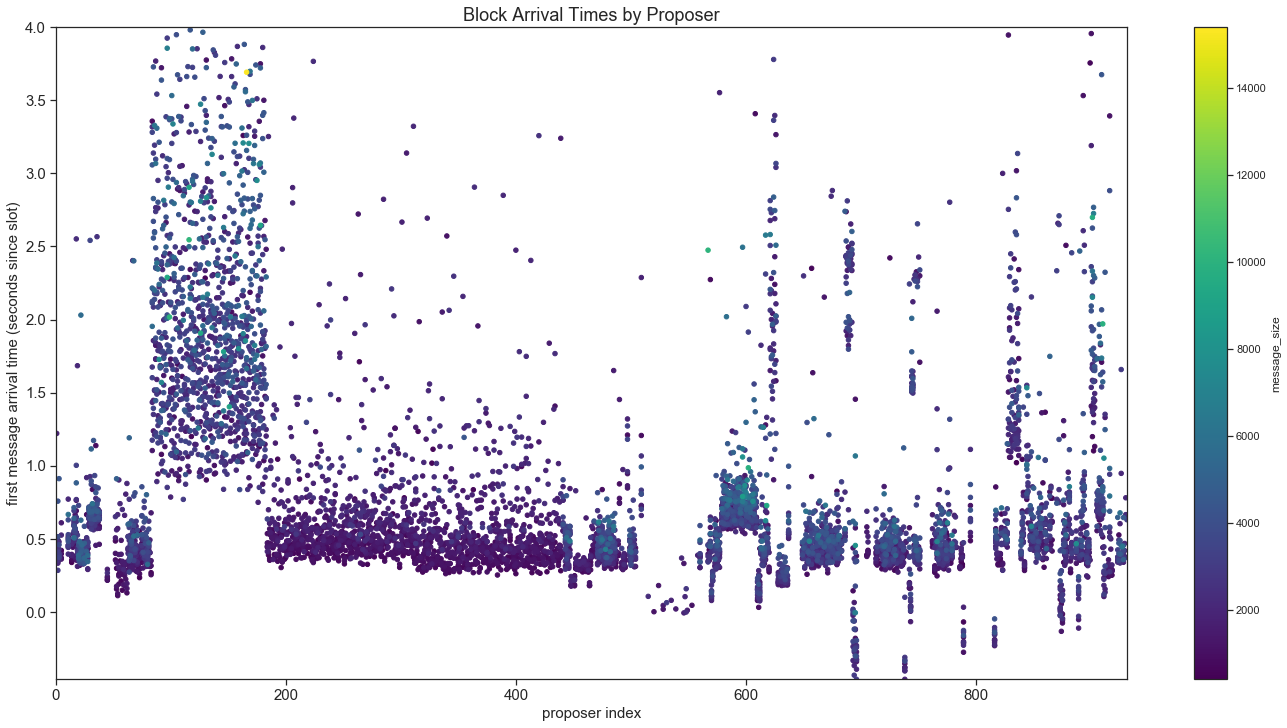

In [297]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xlim = (df_first_message_size_timestamp['proposer_index'].min(),df_first_message_size_timestamp['proposer_index'].max())
ylim = (df_first_message_size_timestamp['relative_timestamp_min'].min(),4)
ax=df_first_message_size_timestamp.plot.scatter(x='proposer_index',y='relative_timestamp_min',c='message_size',colormap='viridis',xlim=xlim,ylim=ylim,figsize=(24,12),ax=ax)
ax.set_title("Block Arrival Times by Proposer",fontsize=18)
ax.set_xlabel("proposer index",fontsize=15)
ax.tick_params(axis = "both", labelsize=15)
ax=ax.set_ylabel("first message arrival time (seconds since slot)",fontsize=15)

In [340]:
df_first_message_size = df_first[df_first['relative_timestamp']<12].groupby(['message_size']).agg({'relative_timestamp':['count','std','min','mean','max']})
df_first_message_size.columns = ['_'.join(col).strip() for col in df_first_message_size.columns.values]
df_first_message_size = df_first_message_size.reset_index()


temp=df_first[df_first['relative_timestamp']<12].groupby(['message_size']).agg({'message_size':['count']})
temp.columns = ['_'.join(col).strip() for col in temp.columns.values]
temp = temp.reset_index()

df_first_message_size['message_size_count']=temp['message_size_count']
df_first_message_size.head()


message_size  relative_timestamp_count  relative_timestamp_std  relative_timestamp_min  relative_timestamp_mean  relative_timestamp_max  message_size_count
0  404           20                       0.163843714710775       0.234999895095825       0.413650000095367        1.020999908447266        20                
1  640           1481                     0.696754745714264       -0.230000019073486      0.689689398455829        11.269000053405762       1481              
2  876           2784                     0.748294837178774       -0.335999965667725      0.750519756441829        9.378999948501587        2784              
3  1112          2483                     0.897830569131022       -0.378999948501587      0.817699153433872        11.845000028610229       2483              
4  1348          1839                     1.066061814995226       -0.352999925613403      0.899615550054163        11.957000017166138       1839

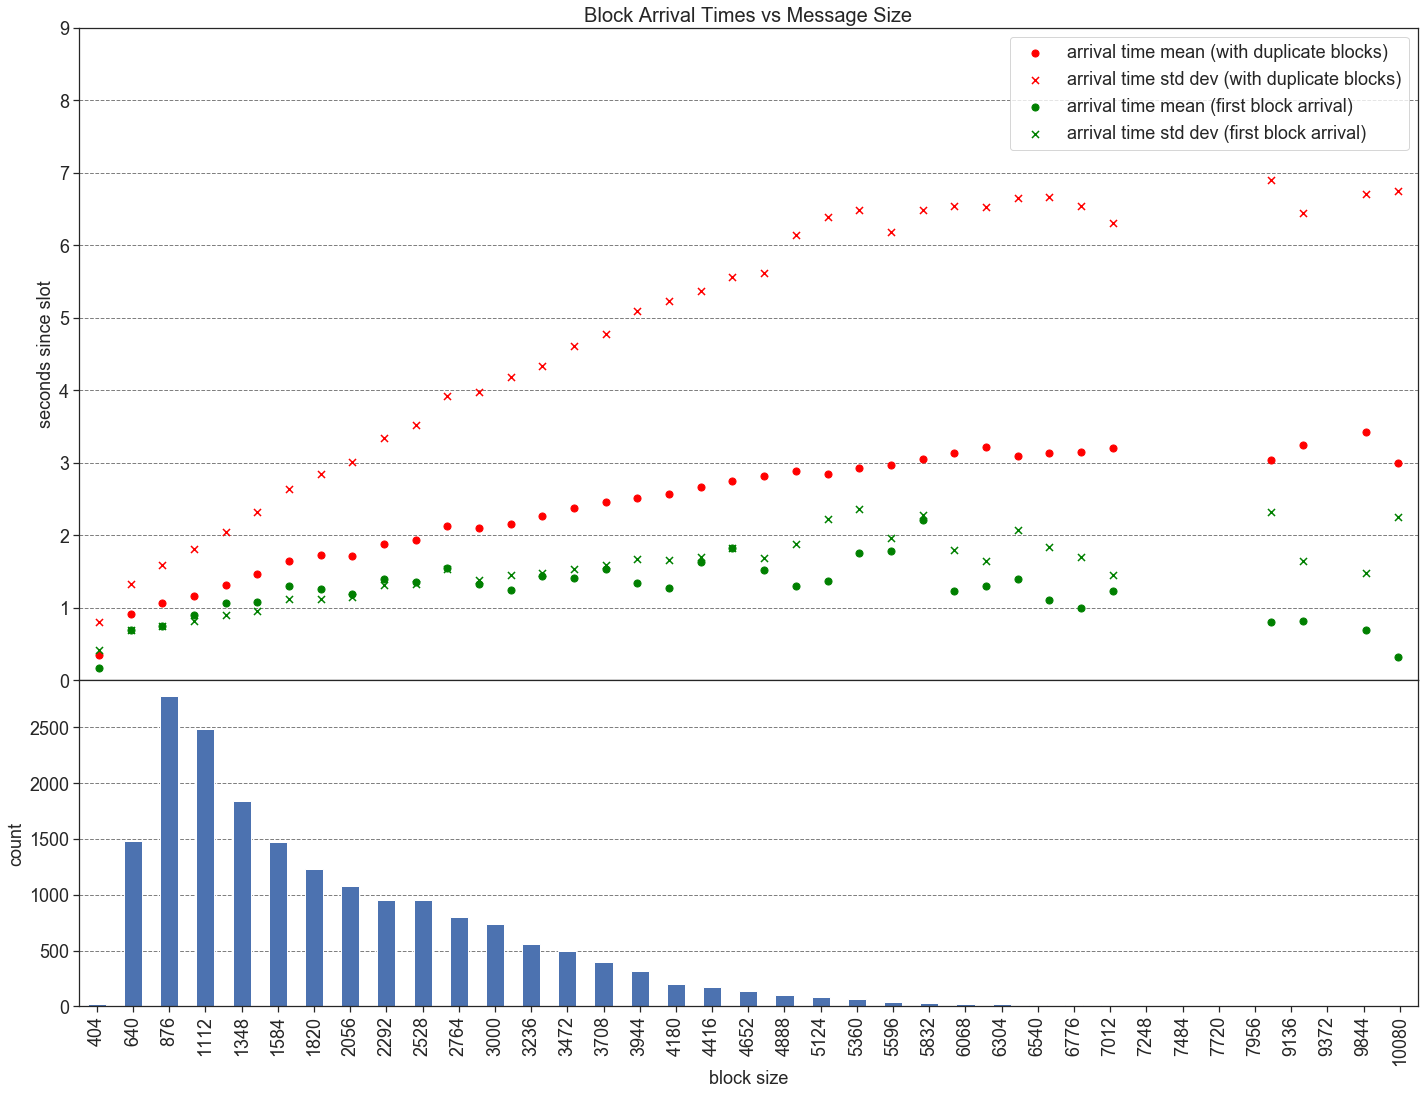

In [347]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig, ax = plt.subplots(ncols=1, nrows=2,gridspec_kw = {'wspace':0, 'hspace':0, 'height_ratios':[2,1]})

xlimit=df_grouped_message_size[df_grouped_message_size['message_size_count']>1]['message_size']
xlim = (xlimit.min()-150,xlimit.max()+150)
ylim = (0,9)

ax[0]=df_grouped_message_size[df_grouped_message_size['message_size_count']>1].plot.scatter(x='message_size',y='relative_timestamp_std',marker='o',c='red',s=50,rot=90,xticks=xlimit.to_list(),xlim=xlim,ylim=ylim,figsize=(24,18),ax=ax[0])
ax[0]=df_grouped_message_size[df_grouped_message_size['message_size_count']>1].plot.scatter(x='message_size',y='relative_timestamp_mean',marker='x',c='red',s=50,rot=90,xticks=xlimit.to_list(),xlim=xlim,ylim=ylim,figsize=(24,18),ax=ax[0])
ax[0]=df_first_message_size[df_first_message_size['message_size_count']>1].plot.scatter(x='message_size',y='relative_timestamp_std',marker='o',c='green',s=50,rot=90,xticks=xlimit.to_list(),xlim=xlim,ylim=ylim,figsize=(24,18),ax=ax[0])
ax[0]=df_first_message_size[df_first_message_size['message_size_count']>1].plot.scatter(x='message_size',y='relative_timestamp_mean',marker='x',c='green',s=50,rot=90,xticks=xlimit.to_list(),xlim=xlim,ylim=ylim,figsize=(24,18),ax=ax[0])
ax[0].legend(loc='upper right',labels=['arrival time mean (with duplicate blocks)', 'arrival time std dev (with duplicate blocks)','arrival time mean (first block arrival)', 'arrival time std dev (first block arrival)'],fontsize=18)
ax[0].set_title("Block Arrival Times vs Message Size",fontsize=20)
ax[0].set_xlabel("")
ax[0].tick_params(axis = "both", labelsize=18)
ax[0].grid(b=True,linestyle='--', linewidth='1', color='grey',which='both',axis='y')
ax[0].set_ylabel("seconds since slot",fontsize=18)
ax[0].xaxis.set_ticklabels([])

ax[1]=df_grouped_message_size[df_grouped_message_size['message_size_count']>1].plot(kind='bar',x='message_size',y='message_size_count',ax=ax[1])
ax[1].set_xlabel("block size",fontsize=18)
ax[1].tick_params(axis = "both", labelsize=18)
ax[1].legend().set_visible(False)
plt.grid(b=True,linestyle='--', linewidth='1', color='grey',which='both',axis='y')
ax[1].set_ylabel("count",fontsize=18)
fig.subplots_adjust(wspace=None, hspace=None)

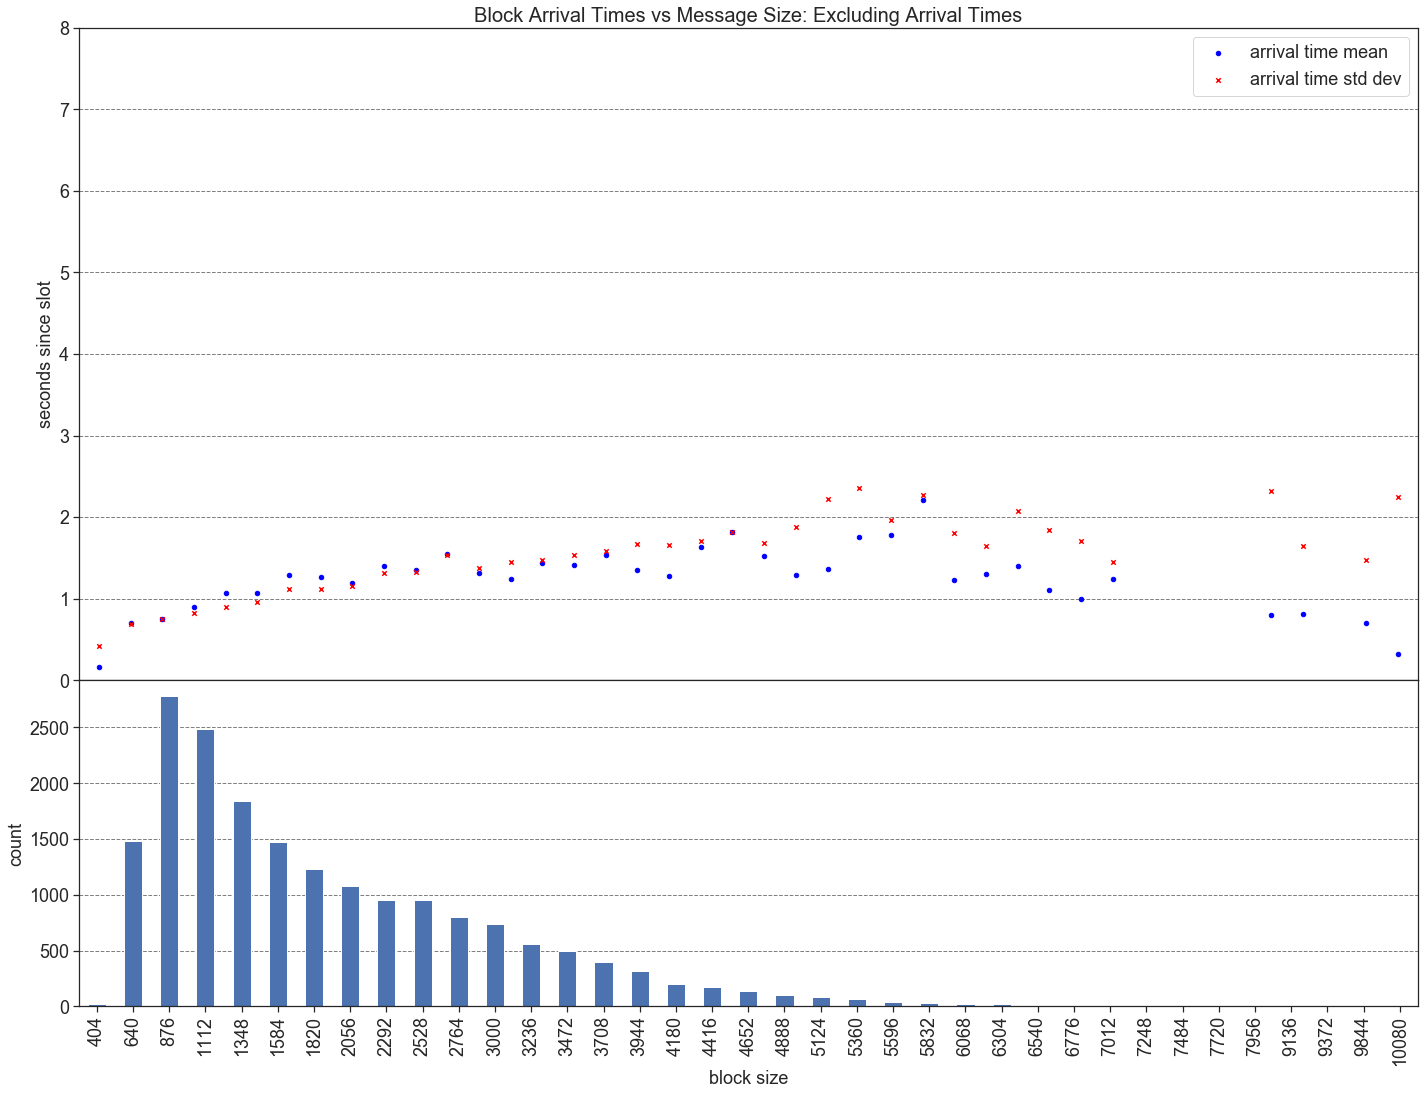

In [341]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig, ax = plt.subplots(ncols=1, nrows=2,gridspec_kw = {'wspace':0, 'hspace':0, 'height_ratios':[2,1]})

xlimit=df_first_message_size[df_first_message_size['message_size_count']>1]['message_size']
xlim = (xlimit.min()-150,xlimit.max()+150)
ylim = (0,8)

ax[0]=df_first_message_size[df_first_message_size['message_size_count']>1].plot.scatter(x='message_size',y='relative_timestamp_std',marker='o',c='blue',rot=90,xticks=xlimit.to_list(),xlim=xlim,ylim=ylim,figsize=(24,18),ax=ax[0])
ax[0]=df_first_message_size[df_first_message_size['message_size_count']>1].plot.scatter(x='message_size',y='relative_timestamp_mean',marker='x',c='red',rot=90,xticks=xlimit.to_list(),xlim=xlim,ylim=ylim,figsize=(24,18),ax=ax[0])
ax[0].legend(loc='upper right',labels=['arrival time mean', 'arrival time std dev'],fontsize=18)
ax[0].set_title("Block Arrival Times vs Message Size: Excluding Arrival Times",fontsize=20)
ax[0].set_xlabel("")
ax[0].tick_params(axis = "both", labelsize=18)
ax[0].grid(b=True,linestyle='--', linewidth='1', color='grey',which='both',axis='y')
ax[0].set_ylabel("seconds since slot",fontsize=18)
ax[0].xaxis.set_ticklabels([])

ax[1]=df_first_message_size[df_first_message_size['message_size_count']>1].plot(kind='bar',x='message_size',y='message_size_count',ax=ax[1])
ax[1].set_xlabel("block size",fontsize=18)
ax[1].tick_params(axis = "both", labelsize=18)
ax[1].legend().set_visible(False)
plt.grid(b=True,linestyle='--', linewidth='1', color='grey',which='both',axis='y')
ax[1].set_ylabel("count",fontsize=18)
fig.subplots_adjust(wspace=None, hspace=None)

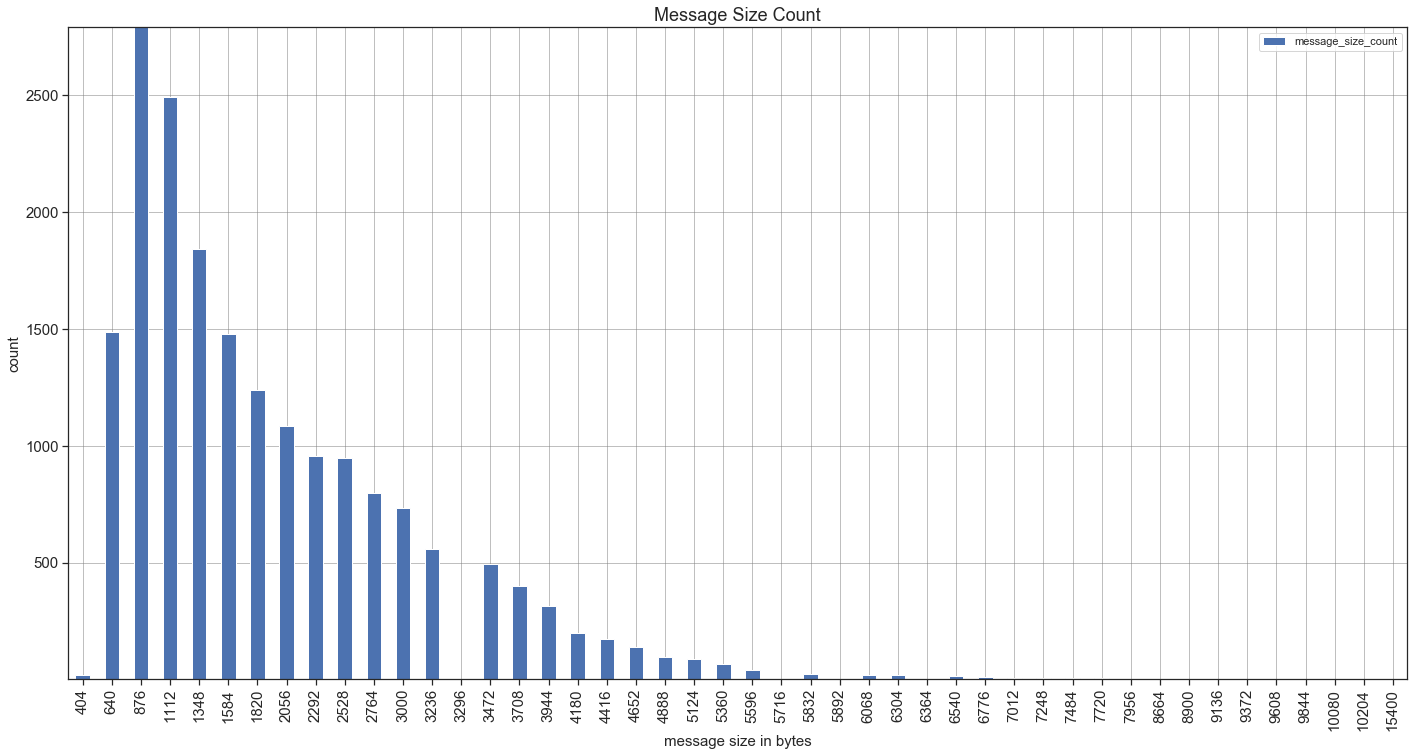

In [299]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xlim = (df_first_message_size['message_size'].min(),df_first_message_size['message_size'].max())
ylim = (df_first_message_size['message_size_count'].min(),df_first_message_size['message_size_count'].max())
ax=df_first_message_size.plot(kind='bar',x='message_size',y='message_size_count',xlim=xlim,ylim=ylim,figsize=(24,12),ax=ax)
ax.set_title("Message Size Count",fontsize=18)
ax.set_xlabel("message size in bytes",fontsize=15)
ax.tick_params(axis = "both", labelsize=15)
plt.grid(b=True,linestyle='-', linewidth='0.5', color='grey',which='both')
ax=ax.set_ylabel("count",fontsize=15)

In [300]:
df_first.groupby(['is_validator'])['relative_timestamp'].describe()

count              mean               std                min               25%               50%               75%                 max
is_validator                                                                                                                                                       
False        5930.000000000000000  1.000519391256078 1.618198098414750 -0.362999916076660 0.437999963760376 0.555000066757202 0.937000036239624 55.700999975204468 
True         12662.000000000000000 1.210229426909540 3.718578290885414 -0.460000038146973 0.461999893188477 0.647000074386597 1.233749985694885 281.055999994277954

Text(0.5, 0, 'proposer index')

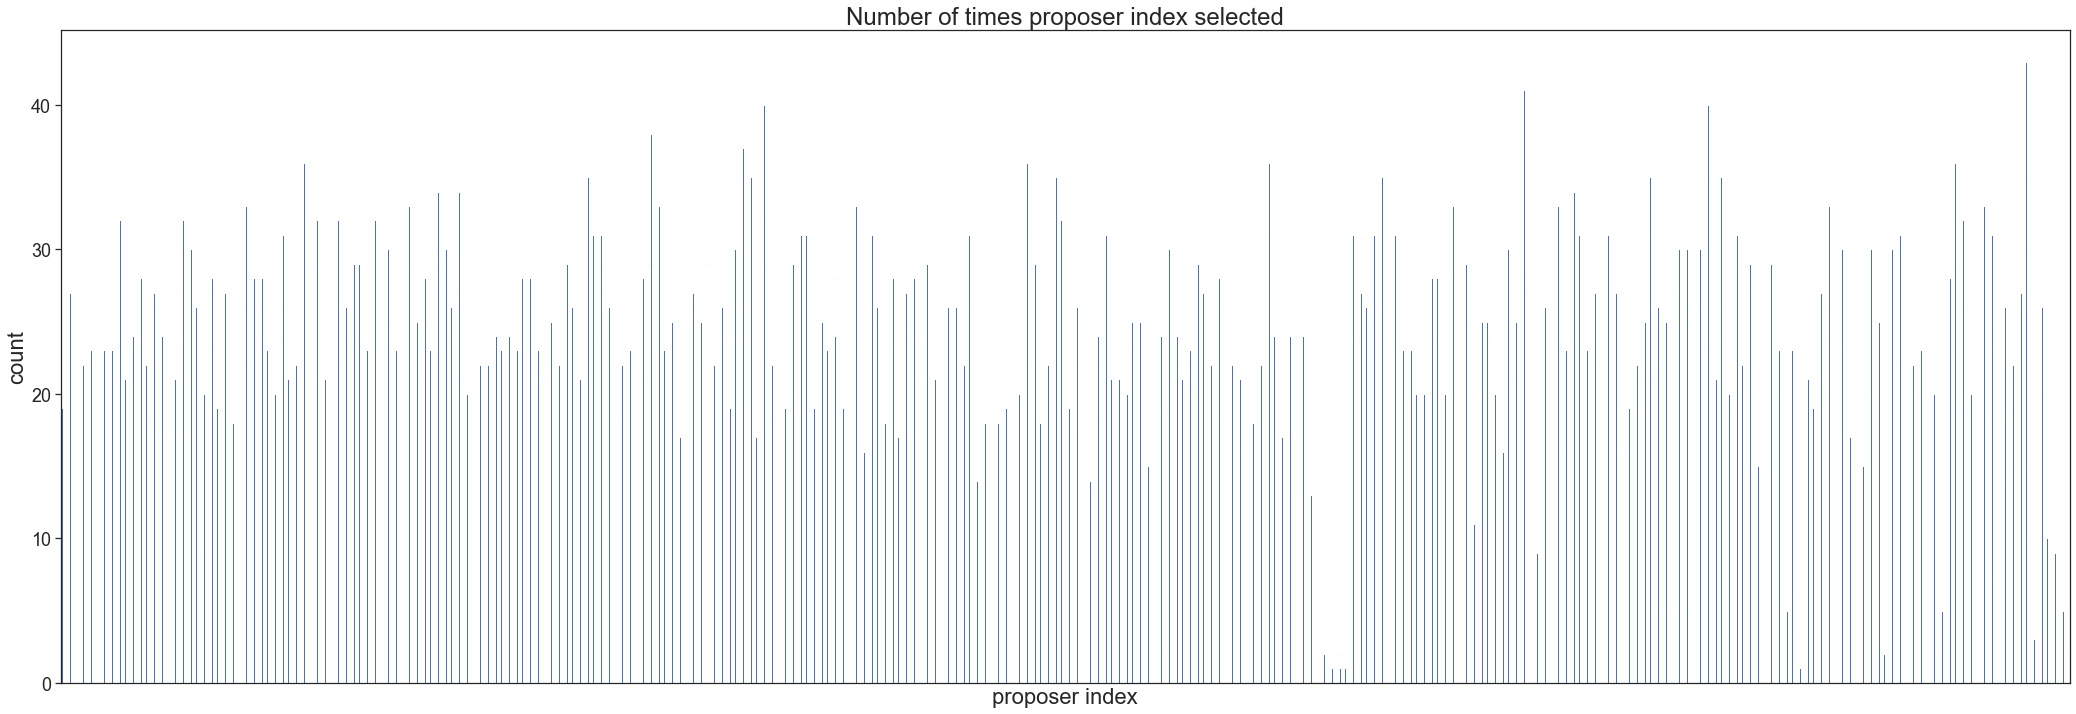

In [335]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title("Number of times proposer index selected",fontsize=24)

ax=df_first.groupby('proposer_index').size().plot(kind='bar',figsize=(36,12))
ax.tick_params(axis = "x", which = "both", bottom = False, top = False, labelbottom=False)
ax=ax.tick_params(axis = "y", labelsize=18)
plt.ylabel("count",fontsize=22)
plt.xlabel("proposer index",fontsize=22)

Text(0.5, 0, 'proposer index')

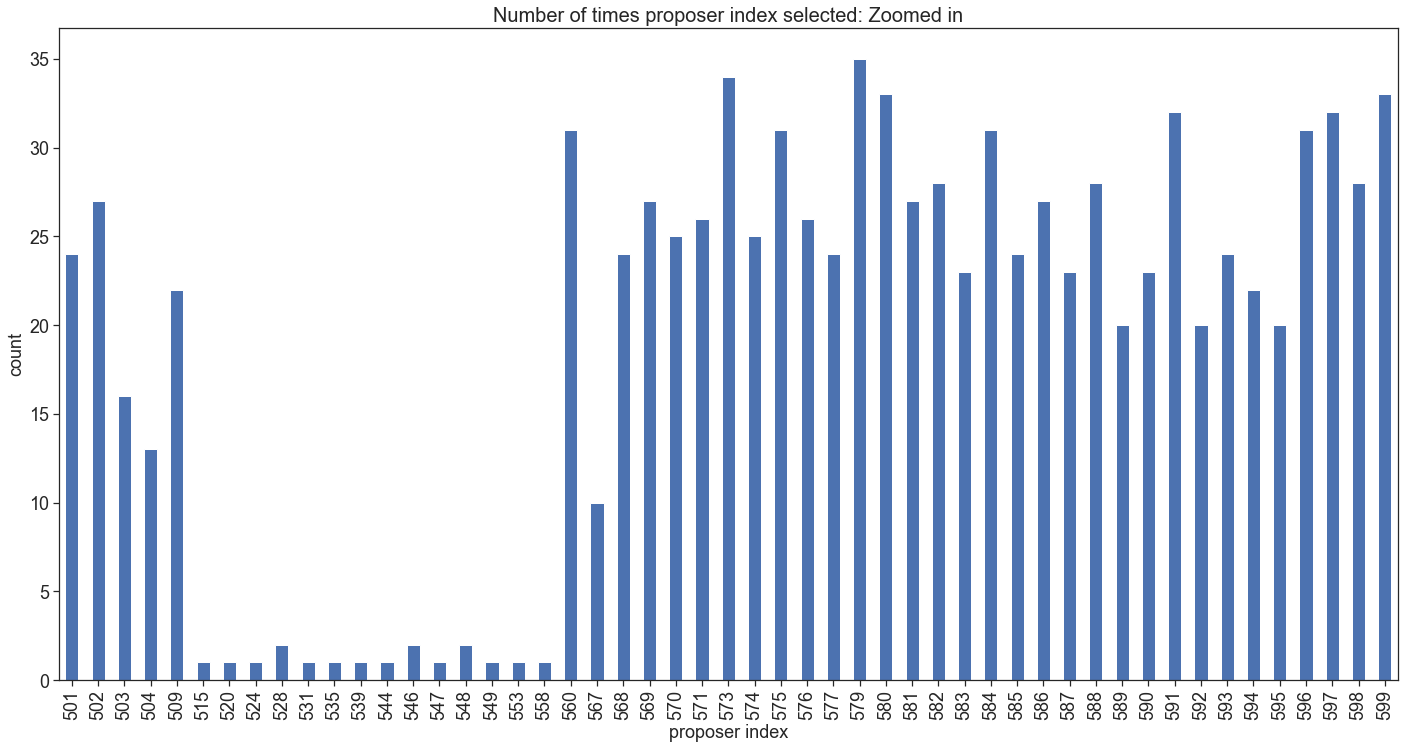

In [302]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title("Number of times proposer index selected: Zoomed in",fontsize=20)

ax=df_first[(df_first['proposer_index']>500)&(df_first['proposer_index']<600)].groupby('proposer_index').size().plot(kind='bar',figsize=(24,12))
ax=ax.tick_params(axis = "both", labelsize=18)
plt.ylabel("count",fontsize=18)
plt.xlabel("proposer index",fontsize=18)

In [303]:
df_prop_index = df_first.groupby('proposer_index')['peer_id'].apply(lambda peer_ids: ','.join(set(peer_ids))).to_frame()
df_prop_index['num_different_peers_first']=df_first.groupby('proposer_index')['peer_id'].nunique()
df_prop_index['num_times_proposed']=df_first.groupby('proposer_index').size()
df_prop_index.sort_values('num_times_proposed',ascending=False)

peer_id  num_different_peers_first  num_times_proposed
proposer_index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
910             16Uiu2HAmD2SAQRGmXTaZF3eFqpzqyvUdr9Ds6qRU8ZuQtLq34iRr,16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RKAPSZzLe,16Uiu2HAmNU5LnMBkM6xsXEnBBLiLqXefJoxmkbgNmFamDkJQeQ7m,16Uiu2HAmUbV7rQw8Z573Dh7cQPFm8PTQzmfuQgYjLcinnfCwgGzr,16Uiu2HAkucMAVckq8yyLU51pbnzjTZ6JptPLKdpH5USBGuuvinHP,16Uiu2HAkuSxTRRBhHe2SP27zUiGtWThHeKVTBwj892BfesmBjd7U,16Uiu2HAmPgSLr36xcCqsm7nZ7ueiqzJ74KG3bpYV7jvGwHzpAGVe,16Uiu2HAmCuRqUMfpXa8ETkdNYN3vTFxbfRLoDsMjpPVunijbmYdu,16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb,16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e,16Uiu2HAmMvENue2gXZ4vExdZVDeW5ZK8vnCYMHCWzxTxsjkHxaMV,16Uiu2HAmPvD41dmBsf6FYgqacPQ4B7FQk5copxwTTdMayMdProvj,16Uiu2HAm8Cv8tCXbAaV9MfvUuTP7BF5y1pZXRainP5VxkpVvZnZa,16Uiu2HAmTXz3fiywgagb1wLE3eFBFqYUjwgAgijetQyq7SayYf1L  14                         43                
634             16Uiu2HAmD2SAQRGmXTaZF3eFqpzqyvUdr9Ds6qRU8ZuQtLq34iRr,16Uiu2HAmUbV7rQw8Z573Dh7cQPFm8PTQzmfuQgYjLcinnfCwgGzr,16Uiu2HAkucMAVckq8yyLU51pbnzjTZ6JptPLKdpH5USBGuuvinHP,16Uiu2HAkuSxTRRBhHe2SP27zUiGtWThHeKVTBwj892BfesmBjd7U,16Uiu2HAmCuRqUMfpXa8ETkdNYN3vTFxbfRLoDsMjpPVunijbmYdu,16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb,16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e,16Uiu2HAmMvENue2gXZ4vExdZVDeW5ZK8vnCYMHCWzxTxsjkHxaMV,16Uiu2HAmPvD41dmBsf6FYgqacPQ4B7FQk5copxwTTdMayMdProvj,16Uiu2HAmTXz3fiywgagb1wLE3eFBFqYUjwgAgijetQyq7SayYf1L                                                                                                                                                                                                                          10                         41                
288             16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RKAPSZzLe,16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU,16Uiu2HAkuSxTRRBhHe2SP27zUiGtWThHeKVTBwj892BfesmBjd7U,16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb,16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        5                          40                
734             16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU,16Uiu2HAmTXz3fiywgagb1wLE3eFBFqYUjwgAgijetQyq7SayYf1L,16Uiu2HAkuSxTRRBhHe2SP27zUiGtWThHeKVTBwj892BfesmBjd7U,16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb,16Uiu2HAmVKjTm3YePQgQLxm3fsfAUVgE58opRHZGDXRNLNsqvzBv,16Uiu2HAmMvENue2gXZ4vExdZVDeW5ZK8vnCYMHCWzxTxsjkHxaMV,16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e,16Uiu2HAm31nBhqoBTZke4hCrsjJ6quC6wQ4jv3sVQZf6dt9PA5Ti,16Uiu2HAmPvD41dmBsf6FYgqacPQ4B7FQk5copxwTTdMayMdProvj,16Uiu2HAm8Cv8tCXbAaV9MfvUuTP7BF5y1pZXRainP5VxkpVvZnZa,16Uiu2HAmUbV7rQw8Z573Dh7cQPFm8PTQzmfuQgYjLcinnfCwgGzr                                                            

In [304]:
peer_validator_map={}
for peer,is_validator in zip(df_first['peer_id'].to_list(),df_first['is_validator'].to_list()):
    peer_validator_map[peer]=is_validator
    
df_always_first = df_prop_index[(df_prop_index['num_different_peers_first']!=df_prop_index['num_times_proposed'])&(df_prop_index['num_different_peers_first']==1)].reset_index()
display(len(df_always_first))
is_validator=[]
for peer in df_always_first['peer_id'].to_list():
    is_validator.append(peer_validator_map[peer])
df_always_first['is_peer_validator']=is_validator
df_always_first[df_always_first['is_peer_validator']==True].sort_values('num_times_proposed',ascending=False)





7

proposer_index                                                peer_id  num_different_peers_first  num_times_proposed  is_peer_validator
2  214             16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU  1                          32                  True             
1  204             16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU  1                          26                  True             
3  256             16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU  1                          17                  True             
0  73              16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU  1                          9                   True

In [305]:
df['posix_timestamp'].min(),df['posix_timestamp'].max()

(1591807044.339, 1592093966.11)

In [306]:
df['relative_timestamp'].min(),df['relative_timestamp'].max()

(-0.46000003814697266, 994.4539999961853)

In [307]:
df.groupby(['peer_id']).agg({'relative_timestamp':['max']})

relative_timestamp
                                                                      max
peer_id                                                                  
16Uiu2HAkuSxTRRBhHe2SP27zUiGtWThHeKVTBwj892BfesmBjd7U 874.525000095367432
16Uiu2HAkucMAVckq8yyLU51pbnzjTZ6JptPLKdpH5USBGuuvinHP 281.936000108718872
16Uiu2HAm1x57ZN8ufTxe9NGfvwXmPi8yUYJpnM42eGhtq1zQBUtv 232.480999946594238
16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RKAPSZzLe 282.039999961853027
16Uiu2HAm31nBhqoBTZke4hCrsjJ6quC6wQ4jv3sVQZf6dt9PA5Ti 282.346999883651733
16Uiu2HAm6eiz7cJMR37xjz5XufWaByhKAsQA9p3hs7ZnJBwcw4w1 9.385999917984009  
16Uiu2HAm8Cv8tCXbAaV9MfvUuTP7BF5y1pZXRainP5VxkpVvZnZa 181.753999948501587
16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb 181.121000051498413
16Uiu2HAmCuRqUMfpXa8ETkdNYN3vTFxbfRLoDsMjpPVunijbmYdu 485.263000011444092
16Uiu2HAmD2SAQRGmXTaZF3eFqpzqyvUdr9Ds6qRU8ZuQtLq34iRr 449.157999992370605
16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e 282.191999912261963
16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU 994.453999996185303
16Uiu2HAmMvENue2gXZ4vExdZVDeW5ZK8vnCYMHCWzxTxsjkHxaMV 92.244999885559082 
16Uiu2HAmNU5LnMBkM6xsXEnBBLiLqXefJoxmkbgNmFamDkJQeQ7m 794.197000026702881
16Uiu2HAmPgSLr36xcCqsm7nZ7ueiqzJ74KG3bpYV7jvGwHzpAGVe 329.920000076293945
16Uiu2HAmPvD41dmBsf6FYgqacPQ4B7FQk5copxwTTdMayMdProvj 282.141000032424927
16Uiu2HAmTXz3fiywgagb1wLE3eFBFqYUjwgAgijetQyq7SayYf1L 281.884000062942505
16Uiu2HAmUbV7rQw8Z573Dh7cQPFm8PTQzmfuQgYjLcinnfCwgGzr 282.295000076293945
16Uiu2HAmVKjTm3YePQgQLxm3fsfAUVgE58opRHZGDXRNLNsqvzBv 281.986999988555908

In [308]:
df.groupby(['peer_id']).agg({'relative_timestamp':['count','min','max']})

relative_timestamp                                       
                                                                   count                min                 max
peer_id                                                                                                        
16Uiu2HAkuSxTRRBhHe2SP27zUiGtWThHeKVTBwj892BfesmBjd7U  17646             -0.460000038146973 874.525000095367432
16Uiu2HAkucMAVckq8yyLU51pbnzjTZ6JptPLKdpH5USBGuuvinHP  18573             -0.362999916076660 281.936000108718872
16Uiu2HAm1x57ZN8ufTxe9NGfvwXmPi8yUYJpnM42eGhtq1zQBUtv  1576              -0.019999980926514 232.480999946594238
16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RKAPSZzLe  8428              -0.362999916076660 282.039999961853027
16Uiu2HAm31nBhqoBTZke4hCrsjJ6quC6wQ4jv3sVQZf6dt9PA5Ti  18447             -0.201999902725220 282.346999883651733
16Uiu2HAm6eiz7cJMR37xjz5XufWaByhKAsQA9p3hs7ZnJBwcw4w1  1                 9.385999917984009  9.385999917984009  
16Uiu2HAm8Cv8tCXbAaV9MfvUuTP7BF5y1pZXRainP5VxkpVvZnZa  11854             -0.293999910354614 181.753999948501587
16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb  12963             -0.328000068664551 181.121000051498413
16Uiu2HAmCuRqUMfpXa8ETkdNYN3vTFxbfRLoDsMjpPVunijbmYdu  17501             -0.403000116348267 485.263000011444092
16Uiu2HAmD2SAQRGmXTaZF3eFqpzqyvUdr9Ds6qRU8ZuQtLq34iRr  15775             -0.326999902725220 449.157999992370605
16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e  18527             -0.348000049591064 282.191999912261963
16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU  18761             -0.391000032424927 994.453999996185303
16Uiu2HAmMvENue2gXZ4vExdZVDeW5ZK8vnCYMHCWzxTxsjkHxaMV  8816              -0.059999942779541 92.244999885559082 
16Uiu2HAmNU5LnMBkM6xsXEnBBLiLqXefJoxmkbgNmFamDkJQeQ7m  18592             -0.326999902725220 794.197000026702881
16Uiu2HAmPgSLr36xcCqsm7nZ7ueiqzJ74KG3bpYV7jvGwHzpAGVe  15572             -0.125000000000000 329.920000076293945
16Uiu2HAmPvD41dmBsf6FYgqacPQ4B7FQk5copxwTTdMayMdProvj  18580             -0.398999929428101 282.141000032424927
16Uiu2HAmTXz3fiywgagb1wLE3eFBFqYUjwgAgijetQyq7SayYf1L  17437             -0.338999986648560 281.884000062942505
16Uiu2HAmUbV7rQw8Z573Dh7cQPFm8PTQzmfuQgYjLcinnfCwgGzr  18576             -0.184000015258789 282.295000076293945
16Uiu2HAmVKjTm3YePQgQLxm3fsfAUVgE58opRHZGDXRNLNsqvzBv  10464             -0.286999940872192 281.986999988555908

In [309]:
df.groupby(['peer_id']).agg({'slot':['min','max']})

slot        
                                                          min     max
peer_id                                                              
16Uiu2HAkuSxTRRBhHe2SP27zUiGtWThHeKVTBwj892BfesmBjd7U  105787  129697
16Uiu2HAkucMAVckq8yyLU51pbnzjTZ6JptPLKdpH5USBGuuvinHP  105787  129697
16Uiu2HAm1x57ZN8ufTxe9NGfvwXmPi8yUYJpnM42eGhtq1zQBUtv  105787  107749
16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RKAPSZzLe  105787  116472
16Uiu2HAm31nBhqoBTZke4hCrsjJ6quC6wQ4jv3sVQZf6dt9PA5Ti  105960  129697
16Uiu2HAm6eiz7cJMR37xjz5XufWaByhKAsQA9p3hs7ZnJBwcw4w1  128578  128578
16Uiu2HAm8Cv8tCXbAaV9MfvUuTP7BF5y1pZXRainP5VxkpVvZnZa  105787  129697
16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb  105787  129697
16Uiu2HAmCuRqUMfpXa8ETkdNYN3vTFxbfRLoDsMjpPVunijbmYdu  105787  129697
16Uiu2HAmD2SAQRGmXTaZF3eFqpzqyvUdr9Ds6qRU8ZuQtLq34iRr  105787  126108
16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e  105787  129697
16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU  105787  129697
16Uiu2HAmMvENue2gXZ4vExdZVDeW5ZK8vnCYMHCWzxTxsjkHxaMV  118211  129697
16Uiu2HAmNU5LnMBkM6xsXEnBBLiLqXefJoxmkbgNmFamDkJQeQ7m  105787  129697
16Uiu2HAmPgSLr36xcCqsm7nZ7ueiqzJ74KG3bpYV7jvGwHzpAGVe  105787  125705
16Uiu2HAmPvD41dmBsf6FYgqacPQ4B7FQk5copxwTTdMayMdProvj  105787  129697
16Uiu2HAmTXz3fiywgagb1wLE3eFBFqYUjwgAgijetQyq7SayYf1L  105787  129697
16Uiu2HAmUbV7rQw8Z573Dh7cQPFm8PTQzmfuQgYjLcinnfCwgGzr  105787  129697
16Uiu2HAmVKjTm3YePQgQLxm3fsfAUVgE58opRHZGDXRNLNsqvzBv  105787  119072

In [310]:
def transform_peer_id(peer_id):
    peer_ids = list(set(df['peer_id'].to_list()))
    for index,an_id in enumerate(peer_ids):
        if an_id == peer_id:
            return index
        


df_first['peer_id_cat']=df_first['peer_id'].apply(transform_peer_id)
df_foo=df_first.sort_values('proposer_index',ascending = True).reset_index(drop=True)
df_foo.head()

message_id   index            posix_timestamp                                                peer_id                                   topic  message_size    slot  proposer_index             slot_timestamp  relative_timestamp             timestamp                                                           node_id             ip4                 tcp4  udp4  ip6  tcp6  udp6  next_fork_version       next_fork_epoch fork_digest  seq_no                               subnet_ids                                                                                                                                                                                                                                                     enr       coordinates  is_validator             distance  relative_timestamp_count  relative_timestamp_std  relative_timestamp_min  relative_timestamp_max  peer_id_cat
0  sX742D0ymJHYUdy35fFWyArVzfRDdG3FO-Xeve0ewMg=  180309 1591994976.380000114440918  16Uiu2HAmNU5LnMBkM6xsXEnBBLiLqXefJoxmkbgNmFamDkJQeQ7m  /eth2/f6775d07/beacon_block/ssz_snappy  1112          121448  0              1591994976.000000000000000 0.380000114440918    2020-06-15][11:06:18  497bd516c05e1794aaa5507121f21afef88f26ff63239c39aee4ac26513c6ce1  51.210.9.77    9000.000000000000000  9000 nan  nan   nan    113                18446744073709551615  f6775d07    191     [7, 14, 30, 31, 34, 43, 44, 45, 53, 60]  enr:-LO4QFls-UvyaDI2kaVOlGaJRoI3PDMoYBfGn_O97VfuIqTldmDebthx7QrHjjh9tY0dzry1mIMmJoVUpDkfG7i6CvOBv4dhdHRuZXRziIBAAMAEOCAQhGV0aDKQ9nddBwAAARP__________4JpZIJ2NIJpcIQz0glNiXNlY3AyNTZrMaEDkckfvhGY422gVDeqDkHYYynOi6zauDk27RsdMiHAzFyDdGNwgiMog3VkcIIjKA  48.5839,7.7455    True         8323.677840043908873  15                       0.602650577638524       0.380000114440918       2.270999908447266        14         
1  xa9P1AvpCagXIMpnv2PfmBuAX3fWGAl9KXKhMbX6jnA=  178481 1591993140.361999988555908  16Uiu2HAkucMAVckq8yyLU51pbnzjTZ6JptPLKdpH5USBGuuvinHP  /eth2/f6775d07/beacon_block/ssz_snappy  876           121295  0              1591993140.000000000000000 0.361999988555908    2020-06-15][11:06:18  2f8b178f0f0fe7eb35758cbcc18b92fc716fb9cdddeb9700b98117657bdfb095  176.9.51.216   9000.000000000000000  9000 nan  nan   nan    113                18446744073709551615  f6775d07    1       []                                       enr:-LK4QKTkBk3I1y4__nfX18Jdhcko2ExQzqpr8byjTB7t8HVFTLKNvipBZbPItODKWFdhBVN8vVh89ScZPdSTNoiLXXoBh2F0dG5ldHOIAAAAAAAAAACEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhLAJM9iJc2VjcDI1NmsxoQICvB04SDhZK46nvJmm6GZvo8RsKctq4uWK6jQRZBxewoN0Y3CCIyiDdWRwgiMo    51.1658,10.4216   False        8326.311519941653387  15                       0.473468724295360       0.361999988555908       1.854000091552734        1          
2  SYlj3rrSBg3maTujnBQcy4P9NfhFmBx3RvFIbGdTDtU=  12357  1591818108.400000095367432  16Uiu2HAmD2SAQRGmXTaZF3eFqpzqyvUdr9Ds6qRU8ZuQtLq34iRr  /eth2/f6775d07/beacon_block/ssz_snappy  1112          106709  0              1591818108.000000000000000 0.400000095367432    2020-06-15][11:06:18  82299a1841162ad9bbe8a95eb3c6de9f431f496bfd64d11a8ec5fba9c72c6876  93.103.215.225 9000.000000000000000  9000 nan  nan   nan    113                18446744073709551615  f6775d07    9       [47]                                     enr:-LK4QMn2TnwrFR4tGyJR_ImrGqbby3QMtiuP7Na4AfL7DFxHBQSBifEY8dQtOXWMCcnn6yNsdvQs9EnbHw1gE1ZgZLEJh2F0dG5ldHOIAAAAAACAAACEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhF1n1-GJc2VjcDI1NmsxoQMFfmIRUNU8wEiiJdL_IWIeP_XcHlw3r-_tc1JZGylMPYN0Y3CCIyiDdWRwgiMo    46.0511,14.5051   True         8903.259446164729525  17                       0.743228239695066       0.400000095367432       2.773999929428101        11         
3  W7-cgUOP88dplk6imSIwyPz39GQoxAbHlgzUMtYNxVI=  214510 1592030508.374000072479248  16Uiu2HAmUbV7rQw8Z573Dh7cQPFm8PTQzmfuQgYjLcinnfCwgGzr  /eth2/f6775d07/beacon_block/ssz_snappy  640           124409  0              1592030508.000000000000000 0.374000072479248    2020-06-15][11:06:18  d47aa98194bf53d9c826d5685b38c54c162df695057ce751268

In [311]:
df_proposers = df_first.groupby('proposer_index')['relative_timestamp'].describe()
df_proposers.columns=[''.join(col).strip() for col in df_proposers.columns.values]
df_proposers = df_proposers.reset_index()
df_proposers[df_proposers['count']>1].sort_values('std')

proposer_index              count               mean                 std               min                25%                50%                 75%                 max
419  440            2.000000000000000  0.403499960899353  0.016263457315990   0.391999959945679 0.397749960422516  0.403499960899353  0.409249961376190   0.414999961853027  
480  528            2.000000000000000  0.032000064849854  0.018384792495240   0.019000053405762 0.025500059127808  0.032000064849854  0.038500070571899   0.045000076293945  
750  914            3.000000000000000  0.282666603724162  0.020207308976008   0.270999908447266 0.270999908447266  0.270999908447266  0.288499951362610   0.305999994277954  
763  931            2.000000000000000  0.647000074386597  0.022627462853741   0.631000041961670 0.639000058174133  0.647000074386597  0.655000090599060   0.663000106811523  
692  842            29.000000000000000 0.330931038692080  0.027948843737170   0.283999919891357 0.309000015258789  0.325999975204468  0.344000101089478   0.418999910354614  
..   ...                           ...               ...                ...                 ...               ...                ...                ...                 ...  
373  394            35.000000000000000 2.567342867170062  11.386217166849871  0.312000036239624 0.447499990463257  0.548000097274780  0.723000049591064   67.979000091552734 
305  326            16.000000000000000 4.758437469601631  13.754524909532380  0.346999883651733 0.533249914646149  0.743999958038330  1.067999958992004   55.700999975204468 
349  370            28.000000000000000 3.682857147284917  16.119882894128935  0.372999906539917 0.459000051021576  0.624499917030334  0.776499986648560   85.927999973297119 
358  379            21.000000000000000 5.186809539794922  19.719278833313030  0.400000095367432 0.466000080108643  0.641000032424927  0.823999881744385   91.186000108718872 
693  843            2.000000000000000  90.728000044822693 127.151941345760505 0.818000078201294 45.773000061511993 90.728000044822693 135.683000028133392 180.638000011444092

[751 rows x 9 columns]